<a href="https://colab.research.google.com/github/1ncl3m3nt3/Comision-61175-Clemente-Marquez/blob/main/ProyectoDS2_Final_Marquez_Clemente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Entrega Final**

*   **Curso:** Data Science II: Machine Learning para la Ciencia de Datos
*   **Comisión:** 61175
*   **Autor:** Clemente Elías Márquez Alvíarez
*   **Tema:** Modelo de Predicción del Precio de Vehículos Usados
*   **Dataset:** autos.csv

## **Presentación del proyecto**

Modelo de Predicción del Precio de Vehículos Usados

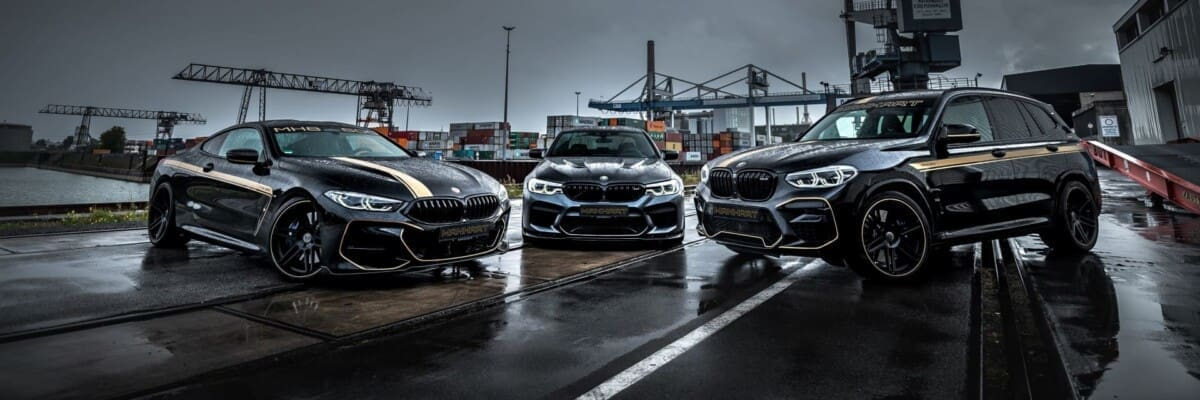

### **Motivación y Audiencia**

Actualmente el mercado de autos usados en todo el mundo está creciendo rápidamente, se espera que este logre alcanzar los 284 mil millones de dólares para el 2030, lo que representa un incremento de casi el 8% anual con respecto al 2021. La razón principal de esto ha sido la inclusión de empresas organizadas en el mercado de los países en desarrollo, que se han encargado de reducir el déficit de confianza que existía en el mercado de autos usados  durante años. Otra razón de suma importancia es la creciente digitalización y la capacidad de las empresas para brindar experiencias de compras inmersivas de forma remota, generando un valor agregado para la experiencia tanto de compradores como de vendedores de este rubro.

Otros factores de este incremento son el aumento de proveedores financieros que ofrecen créditos para autos usados, el aumento de los niveles de ingresos, el aumento de la demanda de automóviles de lujo, períodos de propiedad de automóviles más cortos y una preferencia cada vez mayor por parte de los propietarios de vehículos de dos ruedas para actualizarse a automóviles pequeños y compactos impulsan el crecimiento del mercado.

Con el crecimiento gradual del sector organizado de ventas de vehículos usados, la situación del mercado está cambiando y los principales actores, como Toyota, BMW, Maruti, Suzuki, etc., se han aventurado en esta área de negocio en diversas partes del mundo.

Con la creciente tendencia en tecnología, la compra de vehículos usados a través de ventas en línea se ha convertido en la opción preferida por los clientes en los últimos años. Las empresas nuevas compiten con los jugadores existentes brindando servicios personalizados, una nueva flota y una estrategia de precios bajos. En el mercado norteamericano, donde la relación entre la venta de autos usados y la venta de autos nuevos es de casi 2 a 1, con esto es necesario un elemento diferenciador entre las principales empresas que ofrecen este servicio, para esto muchos jugadores nuevos están aprovechando la inteligencia artificial y el análisis de Big Data para diferenciar su marca y sus ofertas de los concesionarios de autos usados convencionales.

Mencionado todo esto, se genera el interés de desarrollar una herramienta de data science que permita predecir el valor de mercado de un auto usado teniendo en cuenta algunas de las características de este; el modelo estaría dirigido para el personal operativo de la empresa y para el desarrollo de aplicativos o servicios web que permitan tasar el precio de un auto usado sin la necesidad de ser revisado por un perito, de esta forma se pueden obtener beneficios tanto para los clientes externos agilizando y  mejorando considerablemente la experiencia de venta, acelerando la transacción y para la empresa vendedora con la disminución de horas de trabajo o personal especializado para revisar y tasar vehículos que muchas veces no terminan siendo adquiridos por la empresa.

### **Contexto Analitico y Dataset**

El dataset seleccionado contiene 19.237 muestras, cada una de las cuales representa un automóvil usado, estos se dividen en 18 columnas con variables cuantitativas y variables cualitativas, con una columna objetivo que refleja el valor de venta del auto, basándose en valoraciones realistas observadas en transacciones de autos usados.

Con esta información se busca tener una visión integral de los factores que influyen en la valoración del precio de los autos usados, entre estos podemos destacar las siguientes categorías:
* Datos Fabricante: fabricante, modelo, categoría y año de producción.
* Datos Técnicos: tipo de combustible, volumen del motor, cantidad de cilindros, tipo de transmisión, tipo de tracción, ubicación del volante y cantidad de airbags.
* Datos Estéticos: Interior de cuero, cantidad de puertas y color.
* Datos de Uso: Kilometraje
* Datos Financieros: Precio e Impuesto.



### **Fuente**

[https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge)

### **Hipótesis**

Con toda esta información se busca identificar la relación de cada uno de estos factores con la valoración final del precio de un automóvil. Una vez contemos con este análisis nos gustaría poder responder las siguientes preguntas:
*   Cual de las categorías antes mencionadas (datos de fabricante, datos técnicos, datos estéticos o datos de uso) tiene mayor efecto en el incremento de la valoración del auto usado?
*   Esta relación se mantiene en los principales fabricantes o cada uno de estos tiene sus propios factores de incremento de la valoración del precio?
*   Una persona puede tener en consideraciones ciertos factores técnicos y estéticos al adquirir un automóvil para poder obtener el mayor valor de reventa?


### **Objetivo**

El objetivo del proyecto es desarrollar un modelo de data science que pueda predecir el valor de venta de un automóvil usado basándose en diversas características. Para lograr esto, usaremos diversos algoritmos, para poder comparar la efectividad de cada uno de ellos e inclinarnos por el que genere los mejores resultados en la predicción.

## **Lectura de datos**

### **Librerías necesarias para el análisis de datos**

In [2]:
# Importar librerias
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Escoger el tipo de tema para los gráficos
sns.set_theme(style="whitegrid")

### **Lectura del dataset**

In [3]:
# Carga Dataset
url = "https://raw.githubusercontent.com/1ncl3m3nt3/Comision-61175-Clemente-Marquez/refs/heads/main/Datasets/Vehiculos/autos.csv"
dataset = pd.read_csv(url)
dataset

ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 18 columns]

### **Análisis inicial del dataset**

In [4]:
# Informacion de Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Diccionarios de las columnas
- ID: número de identificación del automóvil
- Price: valoración en dólares del automóvil. **(Variable Objetivo)**      
- Levy: impuesto del automóvil.
- Manufacturer: fabricante del automóvil.
- Model: modelo del automóvil.
- Prod. Year: año de producción del automóvil.
-  Category: categoría del tipo del automóvil.
- Leather Interior: tapizado de cuero en el automóvil.
- Fuel Type: tipo de combustible del automóvil.
- Engine Volume: volumen del motor del automóvil.
- Mileage: kilometraje de uso del automóvil.
- Cylinders: cantidad de cilindros del motor del automóvil.
- Gear Box Type: tipo de transmisión del automóvil.
- Drive Wheels: tipo de tracción del automóvil.
- Doors: cantidad de puertas del automóvil.
- Wheel: posición de volante del automóvil.
- Color: color del automóvil.
- Airbags: cantidad de bolsas de aire del automóvil.
   

In [5]:
# Tipos de variables
dataset.dtypes.value_counts()

object     13
int64       4
float64     1
Name: count, dtype: int64

In [6]:
# Tamaño del dataset KB
dataset.size

346266

In [7]:
# Forma del dataset
dataset.shape

(19237, 18)

In [8]:
# Descripción de las variables cuantitativas
dataset.describe().T

count          mean            std         min         25%  \
ID          19237.0  4.557654e+07  936591.422799  20746880.0  45698374.0   
Price       19237.0  1.855593e+04  190581.269684         1.0      5331.0   
Prod. year  19237.0  2.010913e+03       5.668673      1939.0      2009.0   
Cylinders   19237.0  4.582991e+00       1.199933         1.0         4.0   
Airbags     19237.0  6.582627e+00       4.320168         0.0         4.0   

                   50%         75%         max  
ID          45772308.0  45802036.0  45816654.0  
Price          13172.0     22075.0  26307500.0  
Prod. year      2012.0      2015.0      2020.0  
Cylinders          4.0         4.0        16.0  
Airbags            6.0        12.0        16.0

In [9]:
# Descripción de las variables cualitativas
dataset.describe(include=['object']).T

count unique         top   freq
Levy              19237    559           -   5819
Manufacturer      19237     65     HYUNDAI   3769
Model             19237   1590       Prius   1083
Category          19237     11       Sedan   8736
Leather interior  19237      2         Yes  13954
Fuel type         19237      7      Petrol  10150
Engine volume     19237    107           2   3916
Mileage           19237   7687        0 km    721
Gear box type     19237      4   Automatic  13514
Drive wheels      19237      3       Front  12874
Doors             19237      3      04-May  18332
Wheel             19237      2  Left wheel  17753
Color             19237     16       Black   5033

## **Data Wrangling: Limpieza y transformación de datos**

### **Valores duplicados**

In [10]:
# Total de valores duplicados
dataset.duplicated().sum()

313

*Examinamos el dataset para ver la cantidad de valores duplicados.*

In [11]:
# Valores duplicados
duplicate_rows = dataset[dataset.duplicated()]
duplicate_rows

ID  Price  Levy   Manufacturer        Model  Prod. year  \
425    45815372   7840     -  MERCEDES-BENZ        E 200        1998   
1581   45815363   8781     -         TOYOTA          Ist        2002   
1697   45732125  18503     -         TOYOTA        Prius        2010   
1972   45507765  20385     -  MERCEDES-BENZ      CLS 500        2005   
2131   45815363   8781     -         TOYOTA          Ist        2002   
...         ...    ...   ...            ...          ...         ...   
18974  45815465   2352  1273          LEXUS       IS 350        2015   
19137  45810466  15125   642      CHEVROLET      Orlando        2012   
19200  45725908  36065   640  MERCEDES-BENZ  CLA 250 AMG        2013   
19203  45761487  13485   645         TOYOTA        Prius        2011   
19210  45732939   8311   642        HYUNDAI       Sonata        2012   

        Category Leather interior Fuel type Engine volume    Mileage  \
425        Sedan               No       CNG             2  180003 km   
1581   Hatchback               No    Petrol           1.5  117000 km   
1697       Sedan               No    Petrol           1.8  162000 km   
1972       Sedan              Yes    Petrol             5  230000 km   
2131   Hatchback               No    Petrol           1.5  117000 km   
...          ...              ...       ...           ...        ...   
18974      Sedan              Yes    Petrol           3.5   80856 km   
19137       Jeep              Yes    Diesel             2  156834 km   
19200      Sedan              Yes    Petrol     2.0 Turbo   68000 km   
19203      Sedan               No    Hybrid           1.8  281600 km   
19210      Sedan              Yes       LPG             2   36545 km   

       Cylinders Gear box type Drive wheels   Doors             Wheel   Color  \
425          4.0        Manual         Rear  04-May        Left wheel   Black   
1581         4.0     Automatic          4x4  04-May  Right-hand drive     Red   
1697         4.0     Automatic        Front  04-May        Left wheel    Grey   
1972         8.0     Tiptronic         Rear  04-May        Left wheel  Silver   
2131         4.0     Automatic          4x4  04-May  Right-hand drive     Red   
...          ...           ...          ...     ...               ...     ...   
18974        6.0     Automatic          4x4  04-May        Left wheel   Black   
19137        4.0     Automatic        Front  04-May        Left wheel  Golden   
19200        4.0     Tiptronic        Front  04-May        Left wheel     Red   
19203        6.0     Automatic        Front  04-May        Left wheel    Grey   
19210        4.0     Automatic        Front  04-May        Left wheel   White   

       Airbags  
425          4  
1581         4  
1697        12  
1972        10  
2131         4  
...        ...  
18974       12  
19137        4  
19200       12  
19203        8  
19210        4  

[313 rows x 18 columns]

*Identificamos los valores duplicados.*

In [12]:
# Eliminar valores duplicados
dataset = dataset.drop_duplicates()
dataset.duplicated().sum()

0

*Eliminamos los valores duplicados.*

In [13]:
# Información de Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object 
 17

### **Valores nulos**

In [14]:
# Valores nulos
dataset.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

*Examinamos el dataset para ver la cantidad de valores nulos, dado que no hay de estos no es necesario tomar ninguna medida de correción.*

### **Transformaciones de variables y/o valores**

In [15]:
# Chequeo de la cantidad de valores únicos
dataset = dataset.drop('ID', axis=1) # Eliminamos la columna ID
for col in dataset.columns:
    print(f'Cantidad de unicos en {col} son :{len(dataset[col].unique())}')

Cantidad de unicos en Price son :2315
Cantidad de unicos en Levy son :559
Cantidad de unicos en Manufacturer son :65
Cantidad de unicos en Model son :1590
Cantidad de unicos en Prod. year son :54
Cantidad de unicos en Category son :11
Cantidad de unicos en Leather interior son :2
Cantidad de unicos en Fuel type son :7
Cantidad de unicos en Engine volume son :107
Cantidad de unicos en Mileage son :7687
Cantidad de unicos en Cylinders son :13
Cantidad de unicos en Gear box type son :4
Cantidad de unicos en Drive wheels son :3
Cantidad de unicos en Doors son :3
Cantidad de unicos en Wheel son :2
Cantidad de unicos en Color son :16
Cantidad de unicos en Airbags son :17


In [16]:
# Chequeo de los valores únicos
for col in dataset.columns:
    print(f'Categorías en {col} son :\n {dataset[col].sort_values().unique()}\n')

Categorías en Price son :
 [       1        3        6 ...   627220   872946 26307500]

Categorías en Levy son :
 ['-' '1011' '1016' '1017' '1018' '1024' '1028' '1030' '1031' '1032' '1036'
 '1039' '1045' '1047' '1051' '1053' '1054' '1055' '1058' '1062' '1064'
 '1076' '1077' '1079' '1080' '1083' '1086' '1090' '1091' '1094' '1095'
 '1099' '1103' '1104' '1107' '1108' '1109' '1110' '1111' '1113' '1118'
 '1132' '1138' '1141' '1148' '115' '1156' '1163' '11706' '1171' '11714'
 '1172' '1174' '1176' '1178' '1185' '1187' '1190' '1194' '1195' '1197'
 '1198' '1202' '1203' '1205' '1211' '1228' '1234' '1236' '1246' '1249'
 '1252' '1266' '1267' '1268' '1272' '1273' '1275' '1277' '1279' '1282'
 '1285' '1286' '1288' '1292' '1296' '1297' '1301' '1304' '1307' '1308'
 '1317' '1323' '1324' '1325' '1327' '1341' '1342' '1345' '1346' '1347'
 '1356' '1357' '1360' '1361' '1363' '1365' '1366' '1368' '1369' '1375'
 '1384' '1387' '1391' '1399' '1405' '1408' '1411' '1413' '1426' '1436'
 '1437' '1438' '1440' '1441' 

*Examinamos el dataset para ver los valores unicos de las variables e identificar si es necesario aplicar algunos cambios o hace alguna correción.*

In [17]:
# Corrección de la variable Price
# Vamos a eliminar del dataset todos los registros de Precio menor a 500$ por considerarse transacciones fuera del mercado
dataset = dataset[dataset['Price'] >= 500]
dataset = dataset.reset_index(drop=True)
dataset

Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      13328  1399          LEXUS   RX 450        2010       Jeep   
1      16621  1018      CHEVROLET  Equinox        2011       Jeep   
2       8467     -          HONDA      FIT        2006  Hatchback   
3       3607   862           FORD   Escape        2011       Jeep   
4      11726   446          HONDA      FIT        2014  Hatchback   
...      ...   ...            ...      ...         ...        ...   
17286   5802  1055  MERCEDES-BENZ    E 350        2013      Sedan   
17287   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
17288  15681   831        HYUNDAI   Sonata        2011      Sedan   
17289  26108   836        HYUNDAI   Tucson        2010       Jeep   
17290   5331  1288      CHEVROLET  Captiva        2007       Jeep   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
17286              Yes    Diesel           3.5  107800 km        6.0   
17287              Yes       CNG     2.0 Turbo  300000 km        4.0   
17288              Yes    Petrol           2.4  161600 km        4.0   
17289              Yes    Diesel             2  116365 km        4.0   
17290              Yes    Diesel             2   51258 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
17286     Automatic         Rear  04-May        Left wheel    Grey       12  
17287        Manual         Rear  02-Mar        Left wheel  Silver        5  
17288     Tiptronic        Front  04-May        Left wheel     Red        8  
17289     Automatic        Front  04-May        Left wheel    Grey        4  
17290     Automatic        Front  04-May        Left wheel   Black        4  

[17291 rows x 17 columns]

In [18]:
# Corrección de la variable Levy
# Reemplazo de '-' with 0
dataset['Levy']=dataset['Levy'].replace('-','0')
# Convertir Levy a int
dataset['Levy'] = dataset['Levy'].astype('int64')
dataset['Levy']

0        1399
1        1018
2           0
3         862
4         446
         ... 
17286    1055
17287       0
17288     831
17289     836
17290    1288
Name: Levy, Length: 17291, dtype: int64

*La variable Levy tienes algunos valores con "-" los cuales vamos a reemplazar con el valor 0, definimos la variable como entero.*

In [19]:
# Corrección de la variable Engine volume
# Normalizamos a minúscula la palabra turbo
dataset['Engine volume'] = dataset['Engine volume'].str.lower()
# Ubicamos las columnas donde indican la versión turbo y generamos una nueva columna
dataset['Turbo'] = dataset['Engine volume'].str.contains('turbo')
# Remplazo de la palabra 'Turbo' with ''
dataset['Engine volume'] = dataset['Engine volume'].str.replace('turbo','')
# Converting Engine volume a float
dataset['Engine volume'] = dataset['Engine volume'].astype('float64')
dataset[['Engine volume', 'Turbo']]

Engine volume  Turbo
0                3.5  False
1                3.0  False
2                1.3  False
3                2.5  False
4                1.3  False
...              ...    ...
17286            3.5  False
17287            2.0   True
17288            2.4  False
17289            2.0  False
17290            2.0  False

[17291 rows x 2 columns]

*La variable Engine volume contiene algunos casos la indicacion de modelo turbo, en este caso creamos una nueva columna de variable boleana para indicar si es version turbo o no, luego eliminamos la palabra turbo y transformamos la variable en flotante.*

In [20]:
# Corrección de la variable Mileage
# Eliminar la palabra'Km'
dataset['Mileage'] = dataset['Mileage'].str.strip('km')
# Convertir Mileage a int
dataset['Mileage'] = dataset['Mileage'].astype('int64')
dataset['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
17286    107800
17287    300000
17288    161600
17289    116365
17290     51258
Name: Mileage, Length: 17291, dtype: int64

*La variable Mileage tiene la indicacion km, eliminamos esta etiqueta y transformamos la variable en entero.*

In [21]:
# Corrección  de la variable Doors
# Cambia 04-May por 4-5
dataset['Doors']= dataset['Doors'].str.replace('04-May','4-5')
# Cambia 02-Mar por 2-3
dataset['Doors']= dataset['Doors'].str.replace('02-Mar','2-3')
dataset['Doors']

0        4-5
1        4-5
2        4-5
3        4-5
4        4-5
        ... 
17286    4-5
17287    2-3
17288    4-5
17289    4-5
17290    4-5
Name: Doors, Length: 17291, dtype: object

*La variable Doors identifico los datos como si fueran fechas, se realiza la # corrección  para indicar que son una variable objeto.*

In [22]:
# Se agrega la columna Age (Edad del automóvil en Años)
dtime = dt.datetime.now()
dataset['Age']=dtime.year - dataset['Prod. year']
dataset['Age']

0        14
1        13
2        18
3        13
4        10
         ..
17286    11
17287    25
17288    13
17289    14
17290    17
Name: Age, Length: 17291, dtype: int64

*Se genera una nueva columna llamada Age para determinar la edad de antiguedad del vehiculo.*

In [23]:
# Se agrega la columna Mileage year (Kilometraje promedio por Año del automóvil)
dataset['Mileage year']= dataset['Mileage']/dataset['Age']
dataset['Mileage year']= dataset['Mileage year'].astype('int64')
dataset['Mileage year']

0        13286
1        14769
2        11111
3        12997
4         9190
         ...  
17286     9800
17287    12000
17288    12430
17289     8311
17290     3015
Name: Mileage year, Length: 17291, dtype: int64

*Se genera una nueva columna llamada Mileage year para determinar la cantidad de kilometros recorridos por año.*

In [24]:
# Información de Dataset con los ajustes realizados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17291 entries, 0 to 17290
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17291 non-null  int64  
 1   Levy              17291 non-null  int64  
 2   Manufacturer      17291 non-null  object 
 3   Model             17291 non-null  object 
 4   Prod. year        17291 non-null  int64  
 5   Category          17291 non-null  object 
 6   Leather interior  17291 non-null  object 
 7   Fuel type         17291 non-null  object 
 8   Engine volume     17291 non-null  float64
 9   Mileage           17291 non-null  int64  
 10  Cylinders         17291 non-null  float64
 11  Gear box type     17291 non-null  object 
 12  Drive wheels      17291 non-null  object 
 13  Doors             17291 non-null  object 
 14  Wheel             17291 non-null  object 
 15  Color             17291 non-null  object 
 16  Airbags           17291 non-null  int64 

Diccionarios de las columnas nuevas
- Turbo: indica si el volumen del motor es versión turbo.
- Age: indica la cantidad de años del vehículo desde su producción hasta el presente.
- Mileage year: indica la cantidad de kilómetros por año recorridos por el auto.




### **Valores outliers**

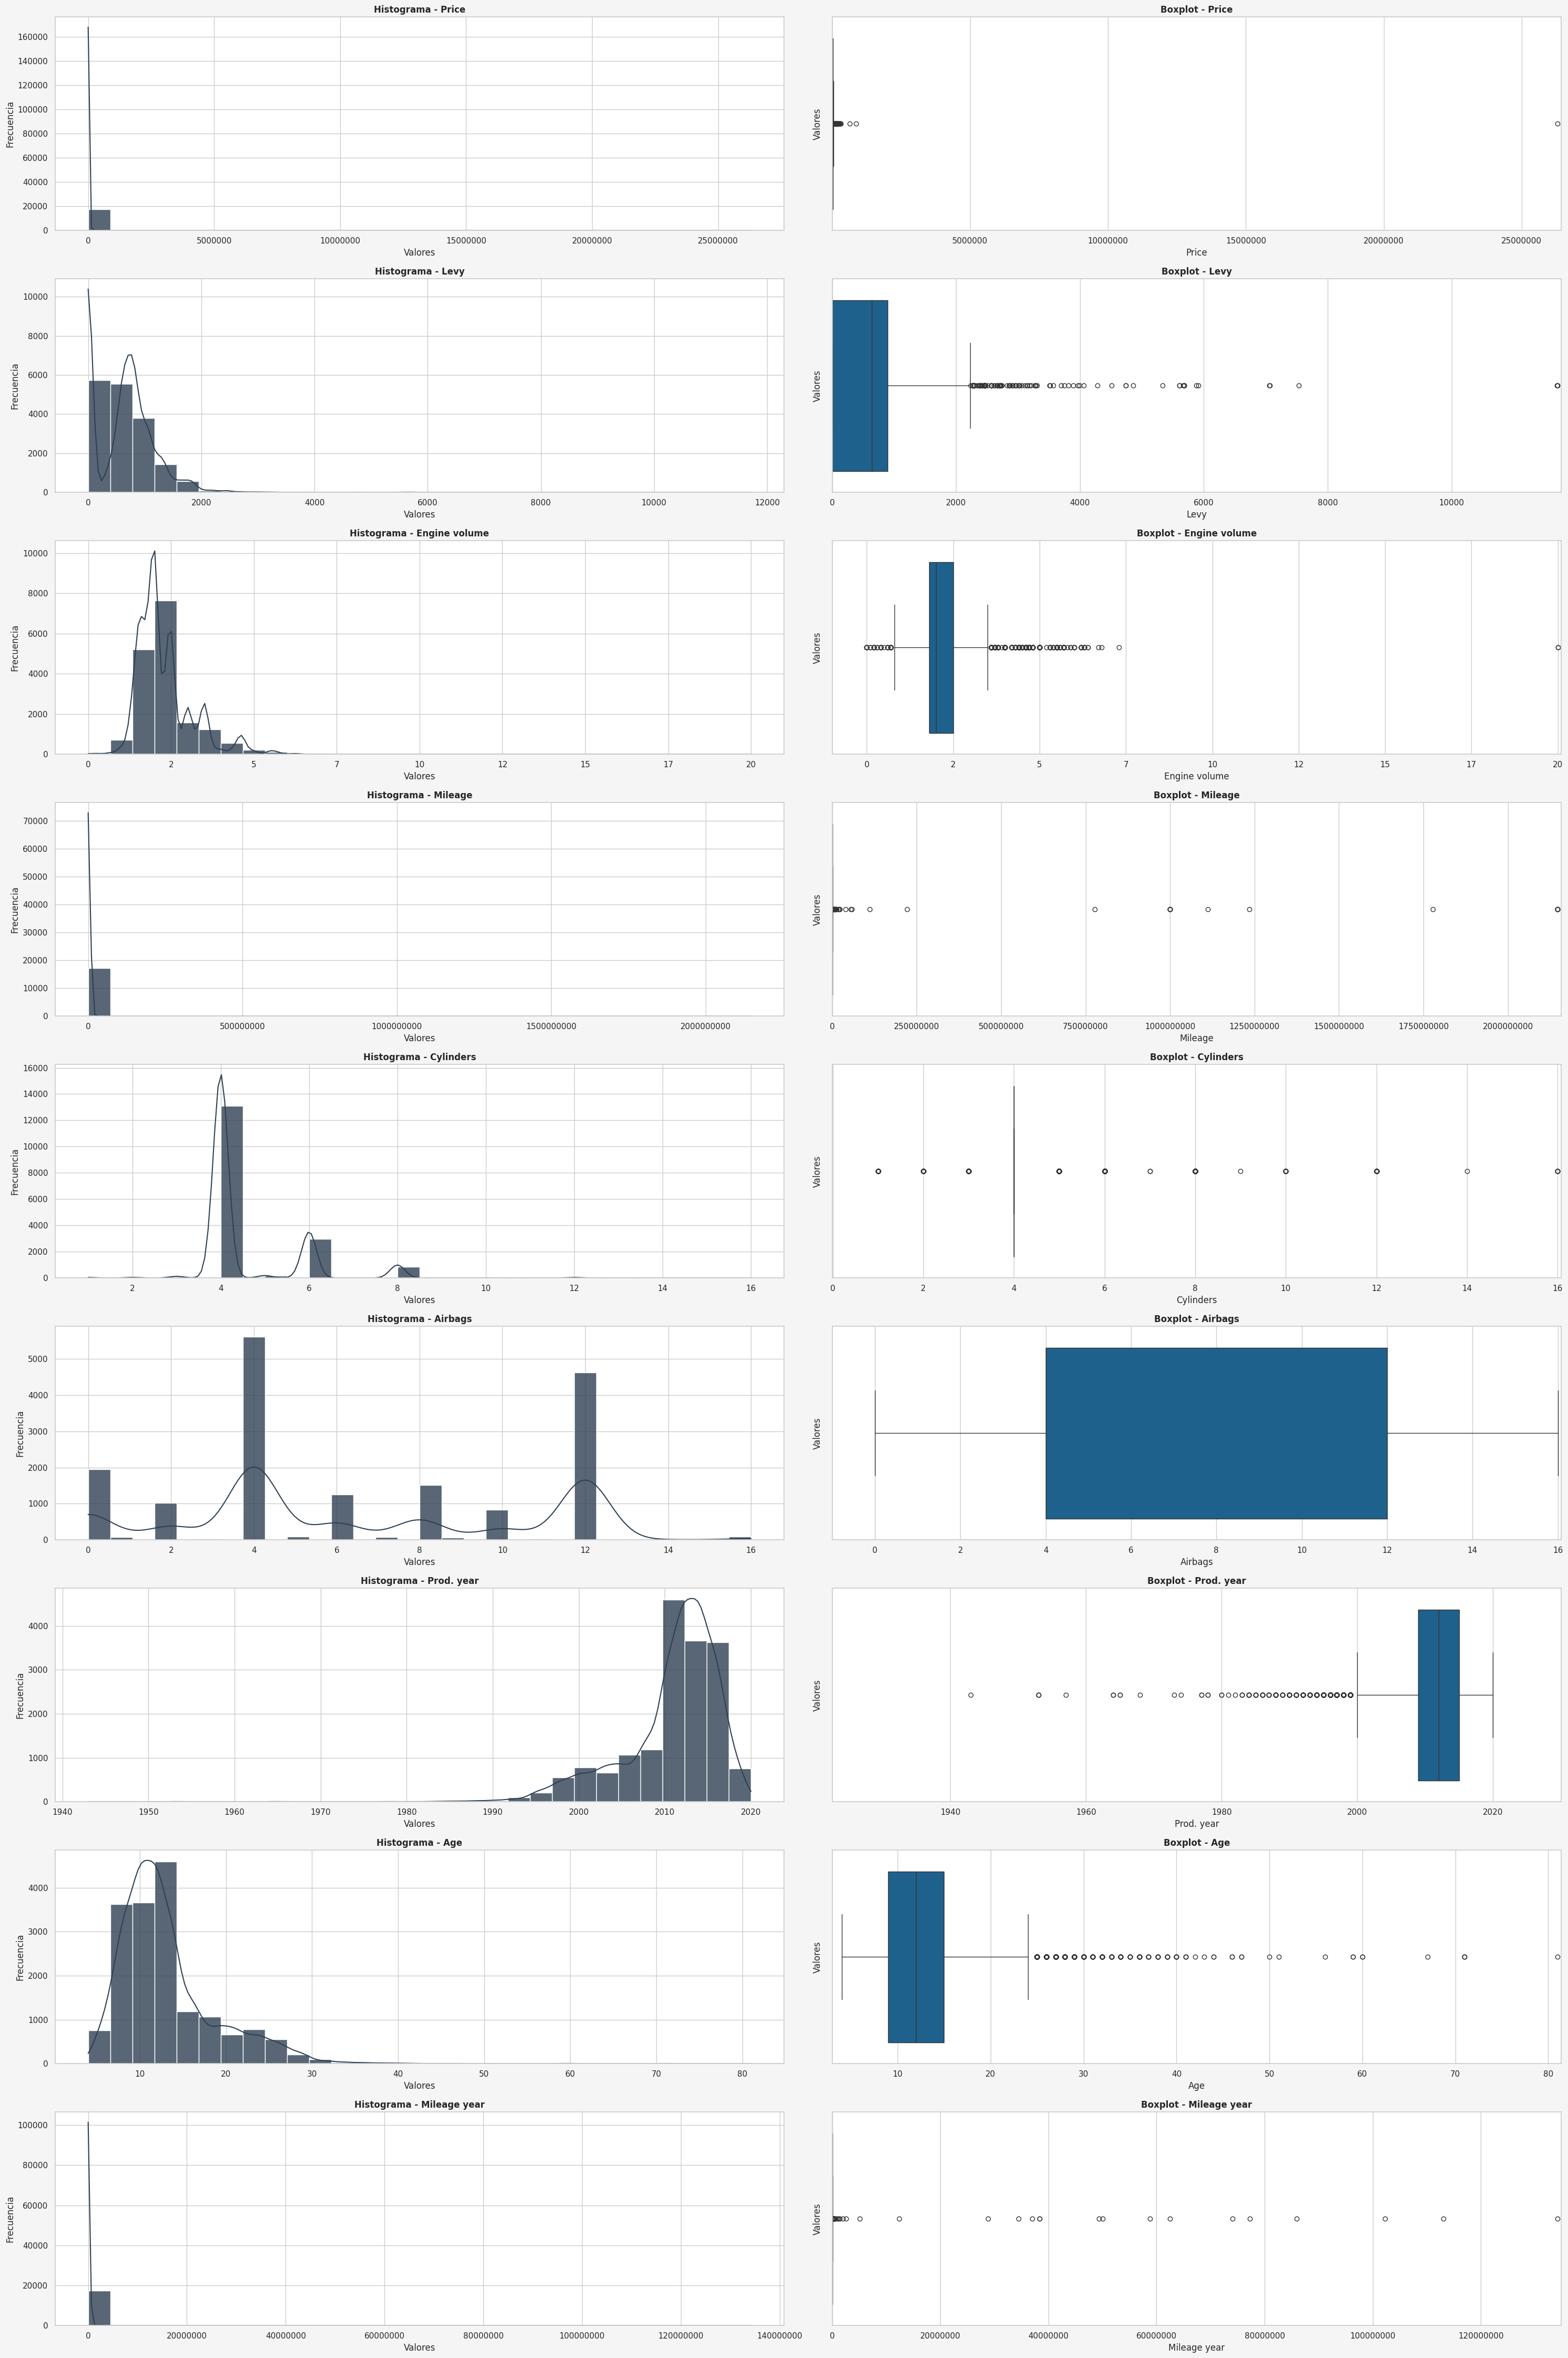

In [25]:
# Graficamos Histograma y Boxplots de las variables relevantes
columnas_seleccionadas = ['Price', 'Levy','Engine volume', 'Mileage','Cylinders', 'Airbags', 'Prod. year', 'Age', 'Mileage year']

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(30, 45), facecolor='whitesmoke')

for i, columna in enumerate(columnas_seleccionadas):
    # Histogramas
    sns.histplot(dataset[columna], bins=30, color='#2e4053', alpha=0.8, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma - {columna}', weight='bold')
    axes[i, 0].set_xlabel('Valores')
    axes[i, 0].set_ylabel('Frecuencia')
    axes[i, 0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

    # Boxplots
    sns.boxplot(x=dataset[columna], ax=axes[i, 1], color='#1f618d', boxprops=dict(facecolor='#1f618d'))
    axes[i, 1].set_title(f'Boxplot - {columna}', weight='bold')
    axes[i, 1].set_ylabel('Valores')
    axes[i, 1].set_xlim(dataset[columna].min()*0.99 - 1, dataset[columna].max()*1.005)
    axes[i, 1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.tight_layout()
plt.show()

In [26]:
# Hacemos el cálculo de los outliers
data_numeric=dataset.select_dtypes(include=['number'])
for col in data_numeric:
    q1=data_numeric[col].quantile(0.25)
    q3=data_numeric[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outlier=((data_numeric[col]>high)|(data_numeric[col]<low)).sum()
    total=data_numeric[col].shape[0]
    print (f'Outliers totales en {col} son:{outlier} = {round(100*(outlier)/total,2)}%')

Outliers totales en Price son:1043 = 6.03%
Outliers totales en Levy son:133 = 0.77%
Outliers totales en Prod. year son:947 = 5.48%
Outliers totales en Engine volume son:1172 = 6.78%
Outliers totales en Mileage son:626 = 3.62%
Outliers totales en Cylinders son:4192 = 24.24%
Outliers totales en Airbags son:0 = 0.0%
Outliers totales en Age son:947 = 5.48%
Outliers totales en Mileage year son:955 = 5.52%


*Se grafican y se calculan los outliers para ver la distribución de estos en las variables cuantitativas, con la finalidad de identificar algunas caos y en caso de ser necesario tomar las medidas correspondientes.*

In [27]:
# Hacemos el cálculo de los outliers de la variable Price y los mostramos para evaluarlos
data_numeric=dataset.select_dtypes(include=['number'])
q1=data_numeric['Price'].quantile(0.25)
q3=data_numeric['Price'].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
high=q3+1.5*iqr
price_outlier=dataset.loc[(dataset['Price']>high) | (dataset['Price']<low)]
price_outlier=price_outlier.sort_values(by='Price', ascending=False)
price_outlier.head(25)

Price  Levy   Manufacturer                    Model  Prod. year  \
15263  26307500     0           OPEL                    Combo        1999   
7704     872946  2067    LAMBORGHINI                     Urus        2019   
1121     627220     0  MERCEDES-BENZ           G 65 AMG 63AMG        2020   
4532     308906  1694        PORSCHE                      911        2016   
13361    297930     0     LAND ROVER        Range Rover Vogue        2019   
8459     297930     0  MERCEDES-BENZ                 AMG GT S        2015   
7005     288521  2269            BMW  M5 Машина в максимально        2018   
9718     260296     0          LEXUS                   LX 570        2018   
5283     254024  1292  MERCEDES-BENZ            GLE 400 A M G        2016   
13760    250574  1481  MERCEDES-BENZ                  GLE 400        2017   
6581     228935     0  MERCEDES-BENZ               GLE 63 AMG        2018   
2079     219527     0        BENTLEY           Continental GT        2012   
6646     216391     0  MERCEDES-BENZ         G 65 AMG G63 AMG        2013   
1049     194438     0  MERCEDES-BENZ                    G 350        2013   
12012    193184     0  MERCEDES-BENZ   GLE 400 Coupe, AMG Kit        2018   
4271     175622  2819        BENTLEY                 Mulsanne        2016   
2506     172486     0         TOYOTA             Land Cruiser        2018   
2635     172486  1951  MERCEDES-BENZ                 S 63 AMG        2015   
5849     172486     0          LEXUS                   LX 570        2013   
8352     172486     0        PORSCHE                    macan        2019   
6975     167781  1292     LAND ROVER              Range Rover        2016   
12035    163077     0            BMW             M6 Gran cupe        2014   
10781    156805     0            BMW                     X5 M        2015   
3665     156805     0  MERCEDES-BENZ                  GLS 450        2018   
13874    153669  1823            BMW                       M3        2018   

          Category Leather interior Fuel type  Engine volume  Mileage  \
15263  Goods wagon               No    Diesel            1.7    99999   
7704     Universal              Yes    Petrol            4.0     2531   
1121          Jeep              Yes    Petrol            6.3        0   
4532         Coupe              Yes    Petrol            4.0     8690   
13361         Jeep              Yes    Diesel            3.0     4500   
8459         Coupe              Yes    Petrol            4.0    20000   
7005         Sedan              Yes    Petrol            4.4    13500   
9718          Jeep              Yes    Petrol            5.7    17700   
5283          Jeep              Yes    Petrol            3.0    73000   
13760         Jeep              Yes    Petrol            3.0    81600   
6581          Jeep              Yes    Petrol            5.5    23000   
2079         Coupe              Yes    Petrol            4.0    55500   
6646          Jeep              Yes    Petrol            5.5    54000   
1049          Jeep              Yes    Diesel            3.0    94000   
12012         Jeep              Yes    Petrol            3.0    20000   
4271         Sedan              Yes    Petrol            6.8     6189   
2506          Jeep              Yes    Diesel            4.7    13000   
2635         Sedan              Yes    Petrol            5.5    73600   
5849          Jeep              Yes    Petrol            5.7    78400   
8352          Jeep              Yes    Petrol            2.0     7400   
6975          Jeep              Yes    Diesel            3.0    81000   
12035        Sedan              Yes    Petrol            0.4   100000   
10781         Jeep              Yes    Petrol            4.4    65500   
3665          Jeep              Yes    Petrol            3.0    31000   
13874        Sedan              Yes    Petrol            3.5     3900   

       Cylinders Gear box type Drive wheels Doors       Wheel   Color  \
15263        4.0        Manual     

*Se observan en detalle algunos de los registros de outliers de precio e identificamos muchos modelos de autos de lujo, con pocos registros por lo que vamos a utilizar la tecnica de capping para el manejo de estos outliers*

In [28]:
columnas_seleccionadas = ['Price', 'Levy', 'Mileage', 'Engine volume', 'Prod. year']

# Definimos una funcion que nos permite fijar los limites superior e inferior de los outlier con el metodo de IQR
def outlier_handle(data, col_list):
    data_new = data.copy()
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr # Límite inferior
        fence_high = q3+1.5*iqr # Límite superior
        # Fijación de límites (Capping)
        data_new.loc[:, col_name] = np.where(data[col_name] > fence_high, np.round(fence_high),
                                           np.where(data[col_name] < fence_low, np.round(fence_low),
                                                    data[col_name]))
    return data_new
dataset = outlier_handle(dataset, columnas_seleccionadas)

*Se fijaron los límites superiores e inferiores de los outliers con el metodo IQR como tratamiento de estos valores*

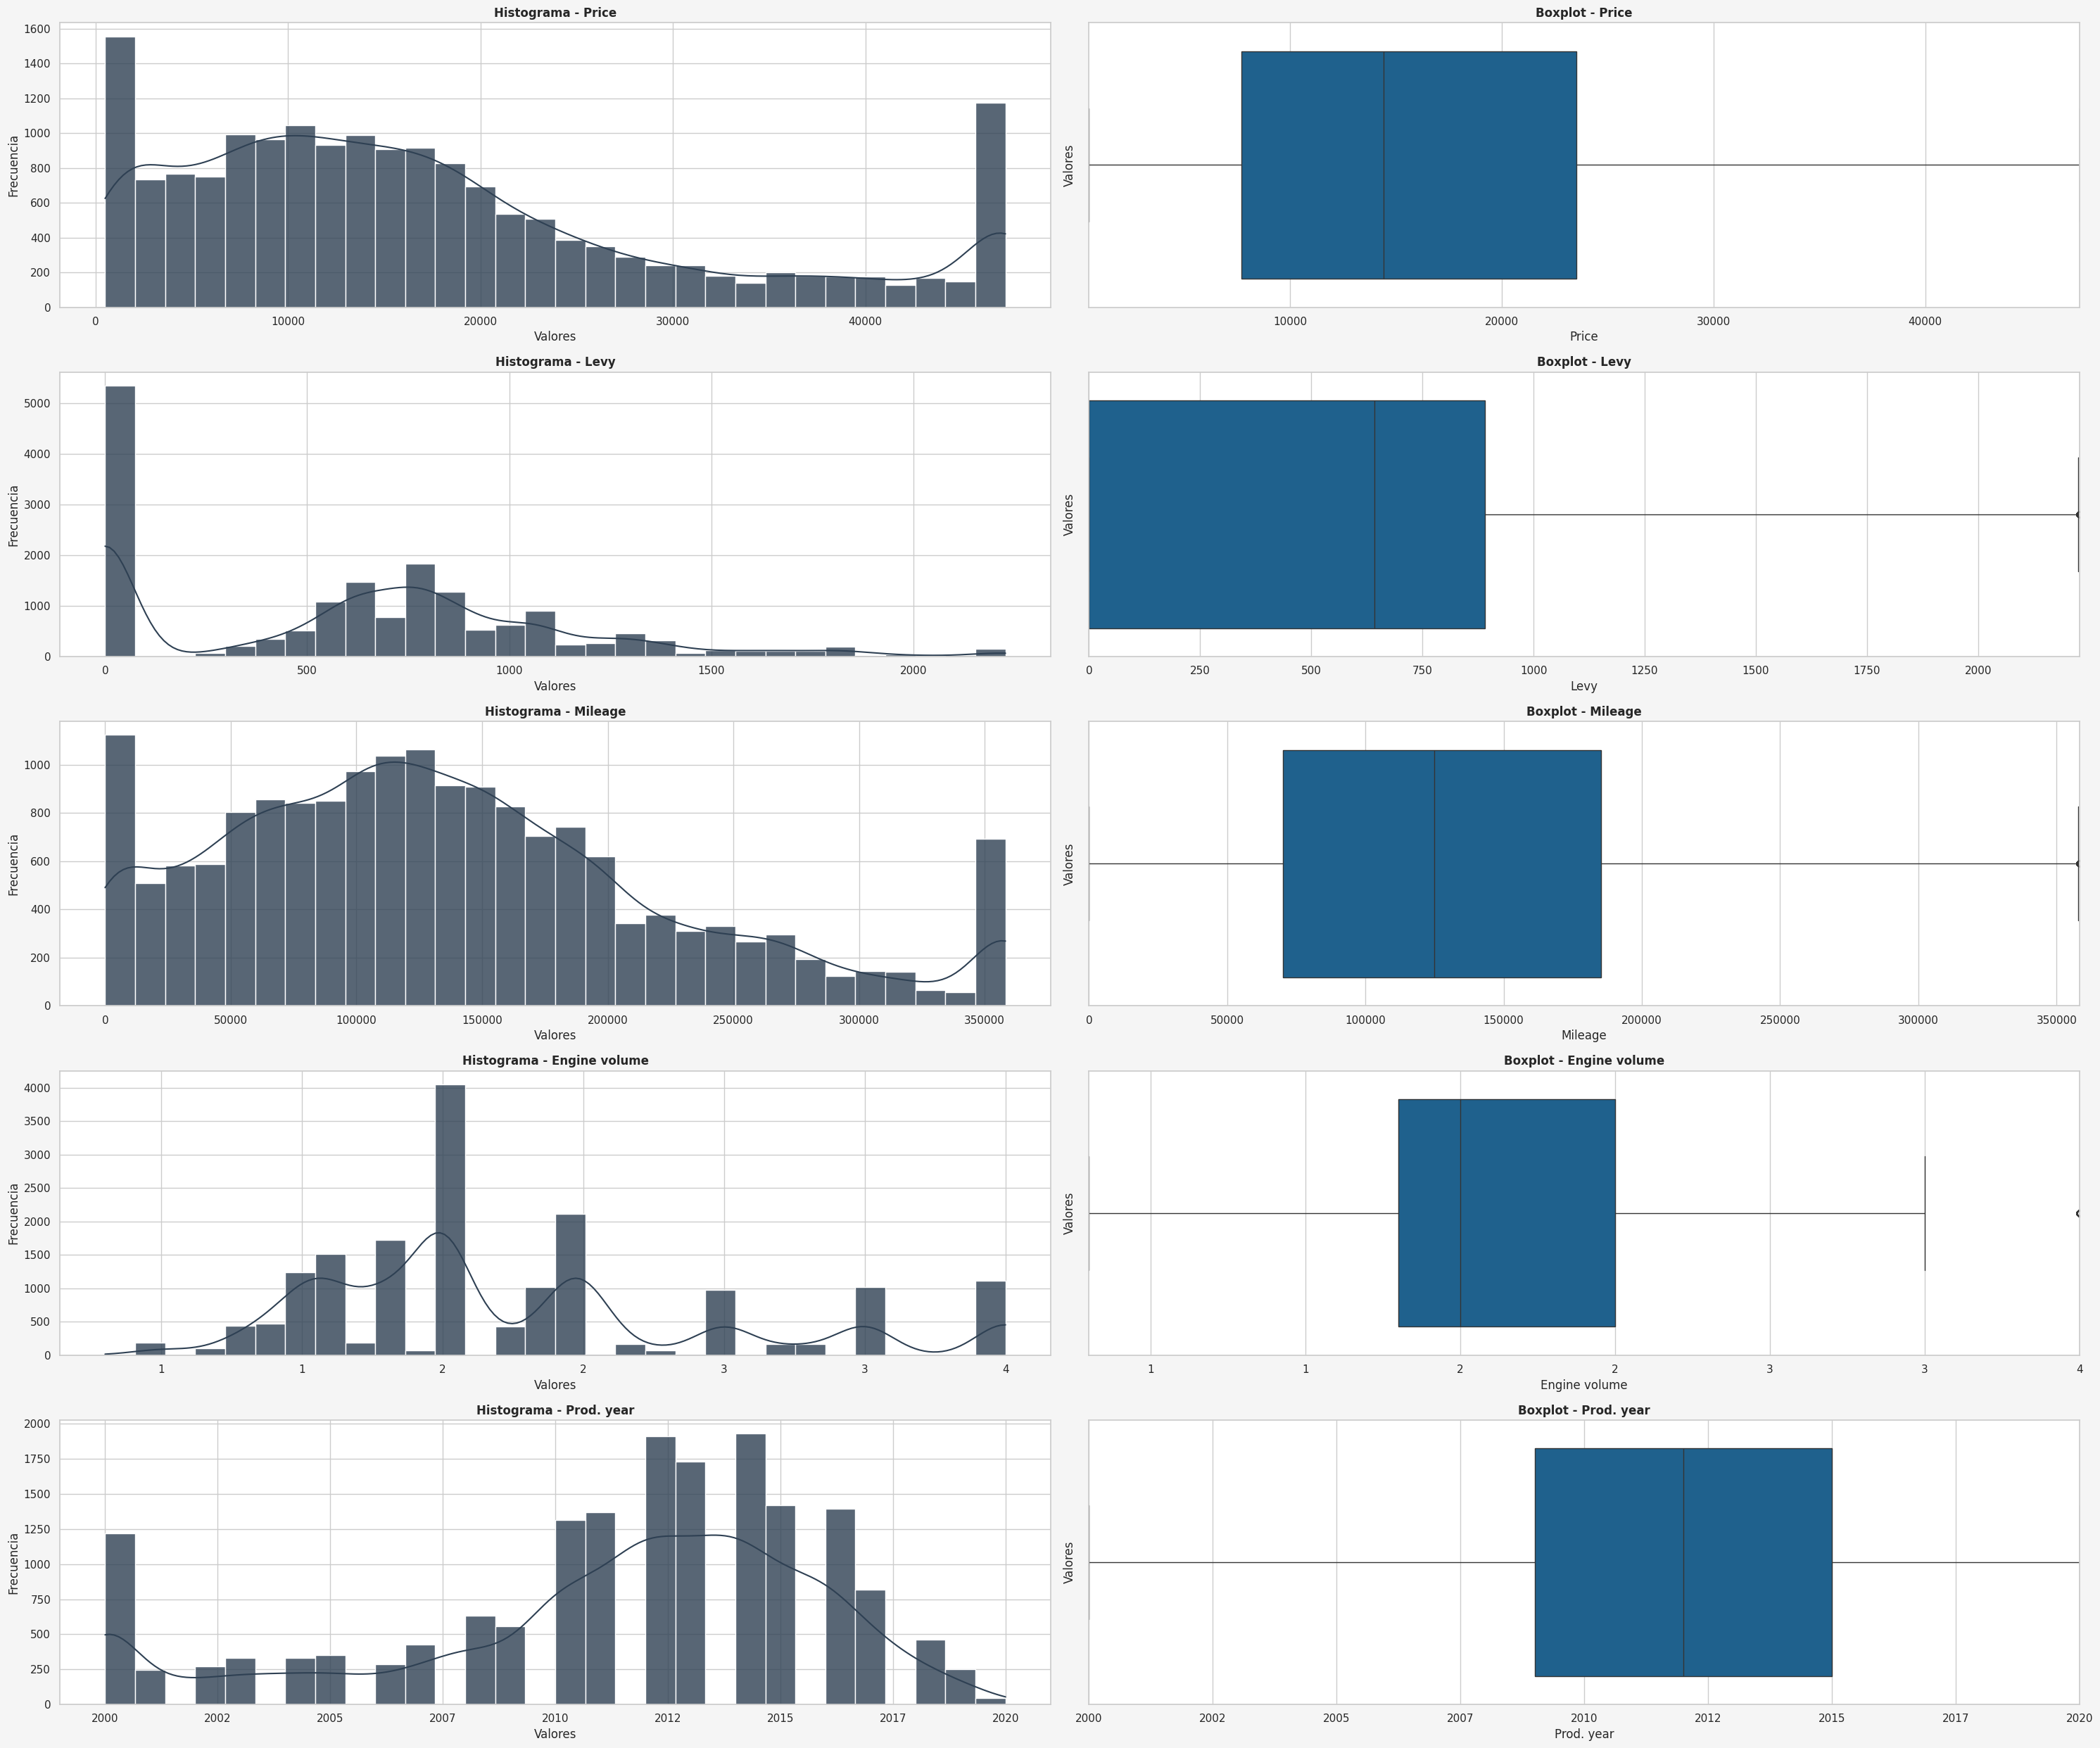

In [29]:
# Graficamos con los límites fijados
columnas_seleccionadas = ['Price', 'Levy', 'Mileage', 'Engine volume', 'Prod. year']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 25), facecolor='whitesmoke')

for i, columna in enumerate(columnas_seleccionadas):
    # Histograma
    sns.histplot(dataset[columna], bins=30, color='#2e4053', alpha=0.8, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma - {columna}', weight='bold')
    axes[i, 0].set_xlabel('Valores')
    axes[i, 0].set_ylabel('Frecuencia')
    axes[i, 0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

    # Boxplot
    sns.boxplot(x=dataset[columna], ax=axes[i, 1], color='#1f618d', boxprops=dict(facecolor='#1f618d'))
    axes[i, 1].set_title(f'Boxplot - {columna}', weight='bold')
    axes[i, 1].set_ylabel('Valores')
    axes[i, 1].set_xlim(dataset[columna].min(), dataset[columna].max())
    axes[i, 1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

plt.tight_layout()
plt.show()

## **EDA: Análisis Exploratorio de datos**

### **Análisis univariado**

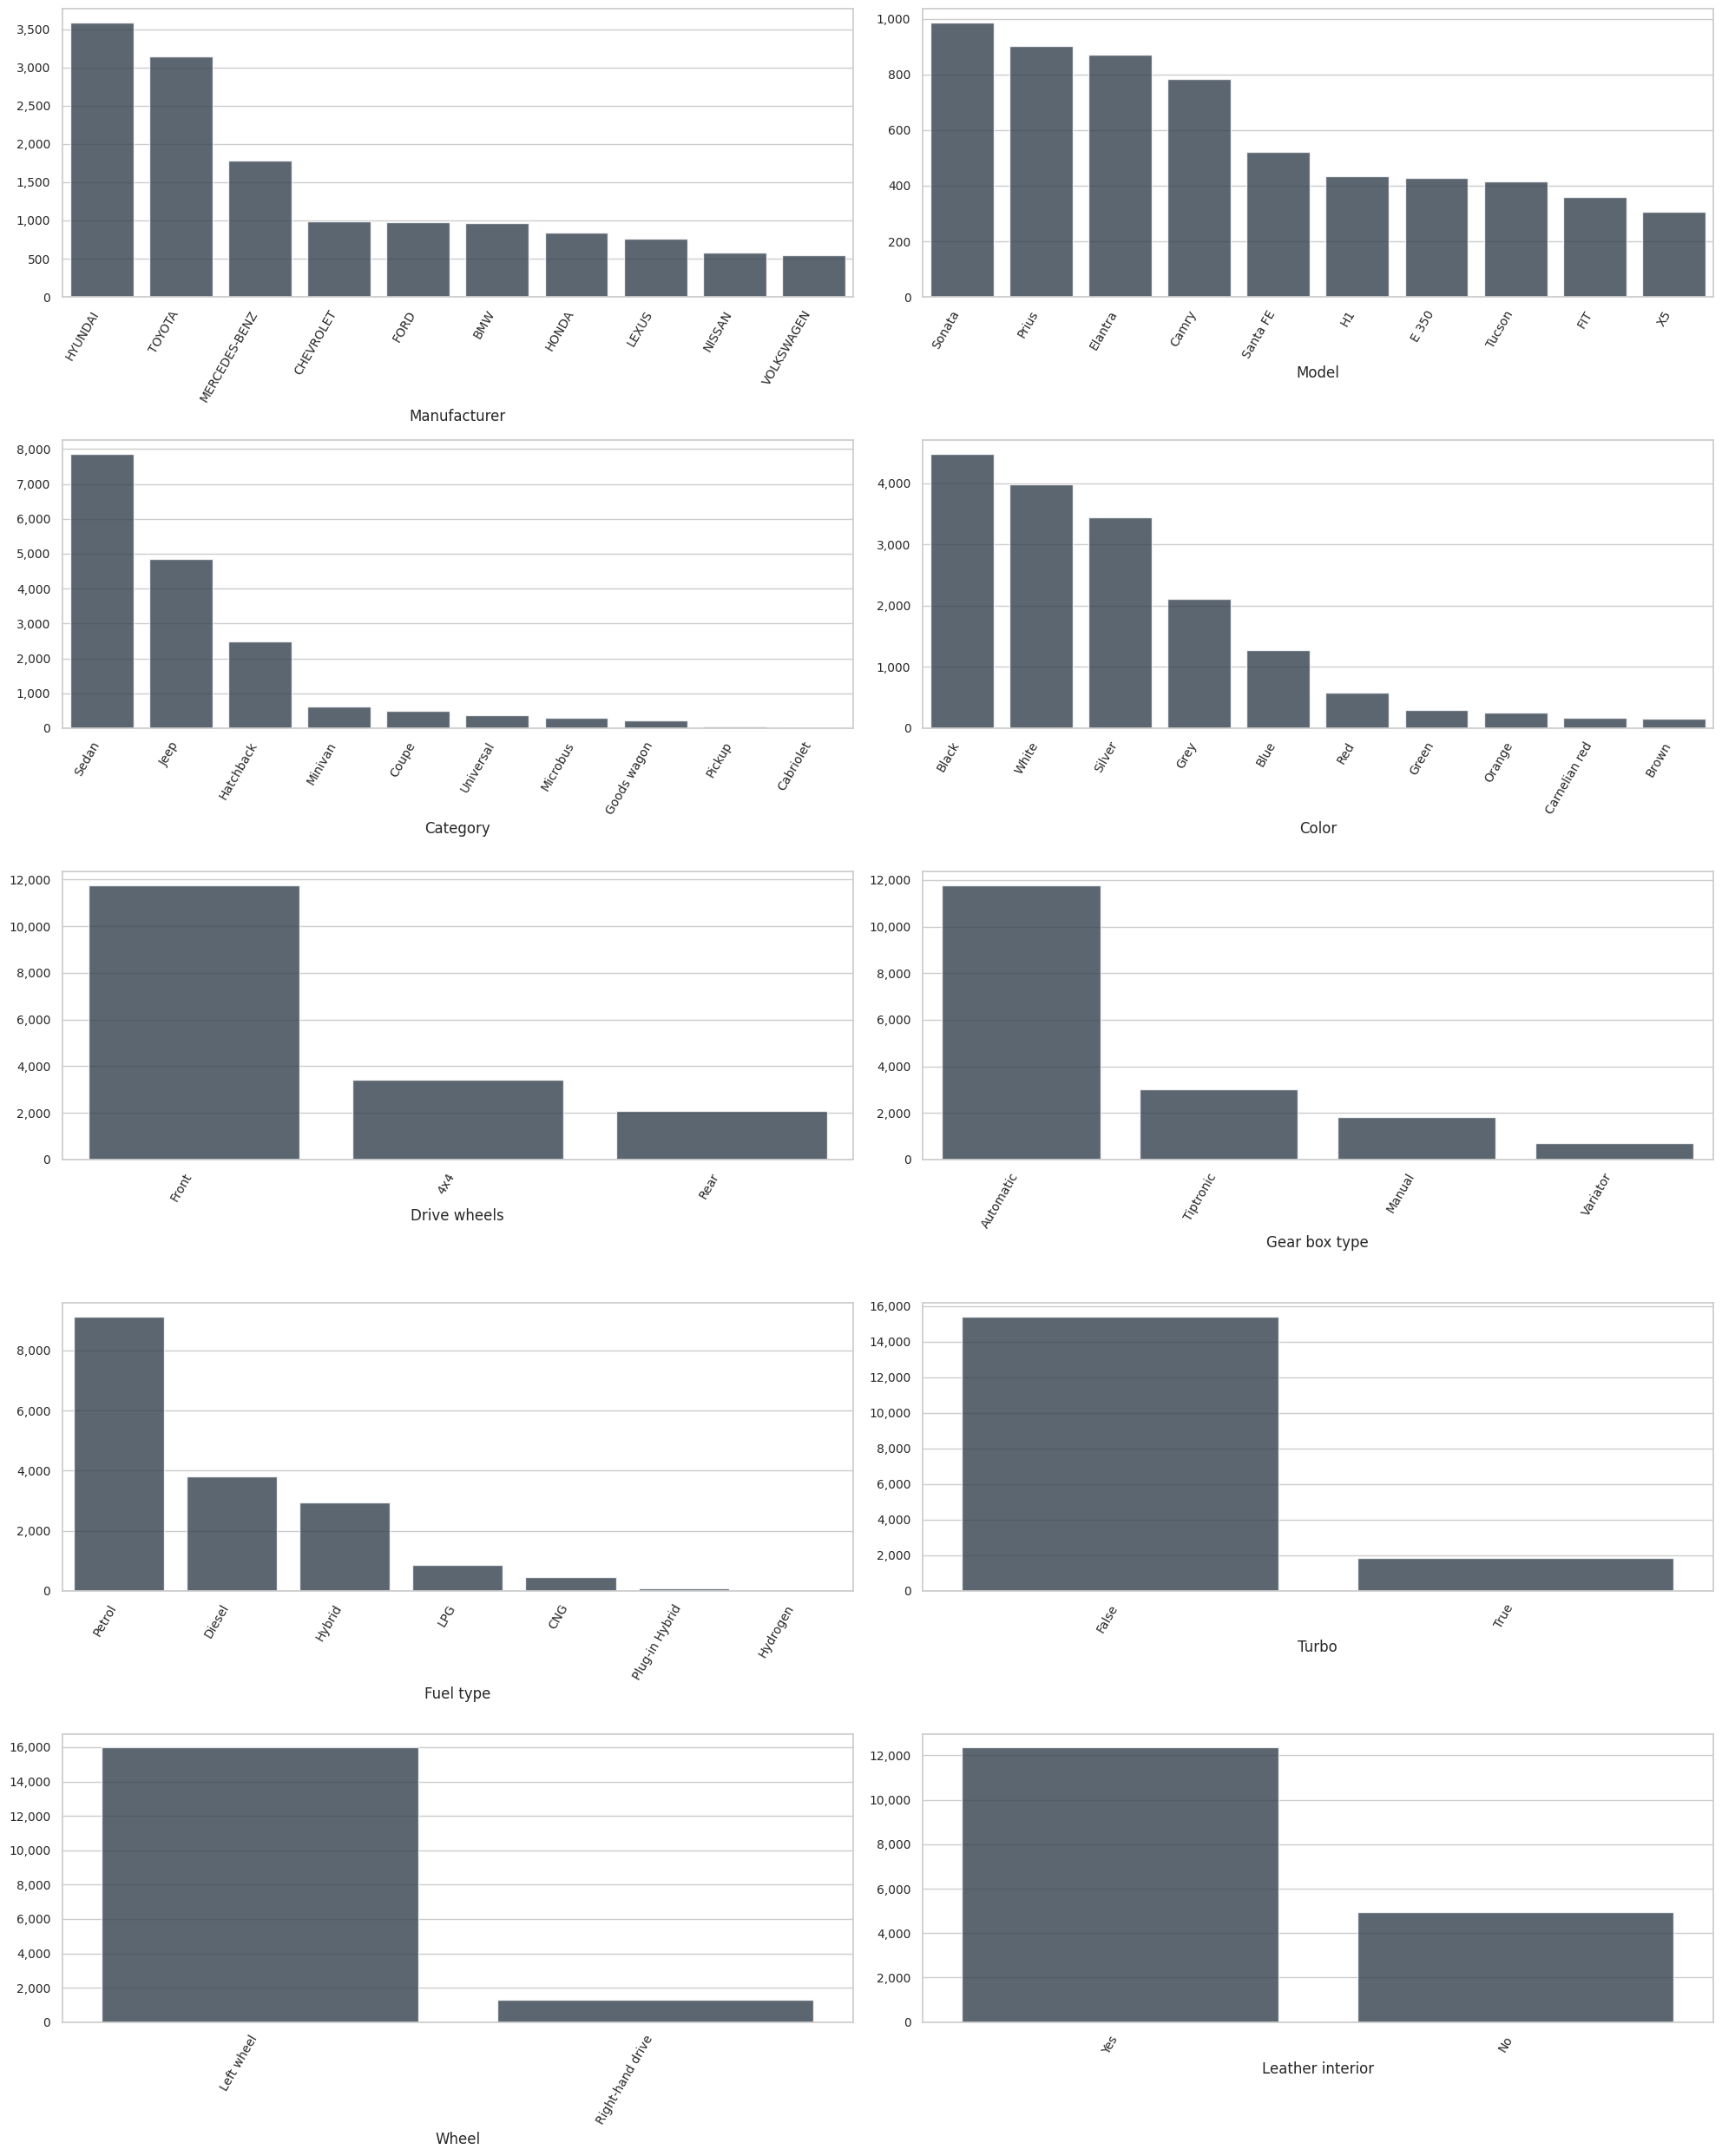

In [30]:
columnas_seleccionadas = ['Manufacturer','Model','Category' , 'Color' , 'Drive wheels', 'Gear box type', 'Fuel type' , 'Turbo', 'Wheel', 'Leather interior']

#Indicamos el tamaño de los gráficos
plt.figure(figsize=(20, 25))

#Corremos un ciclo for para ir graficando cada una de las variables
for i, column in enumerate(columnas_seleccionadas):
    plt.subplot(5, 2, i + 1)
    top_10_cars = dataset[column].value_counts().sort_values(ascending=False).head(10)
    sns.barplot(x=top_10_cars.index, y=top_10_cars.values, color='#2e4053', alpha=0.8)
    plt.xticks(rotation=60, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    current_axes = plt.gca()
    current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()

*Se realizaron los gráficos de barra para poder observar las cantidades de cada tipo de elemento de las variables cualitativas y así poder determinar si alguna de estas concentra la mayor cantidad de registros, lo cual nos podria servir para enfocarenos en el modelo.*

### **Análisis bivariado**

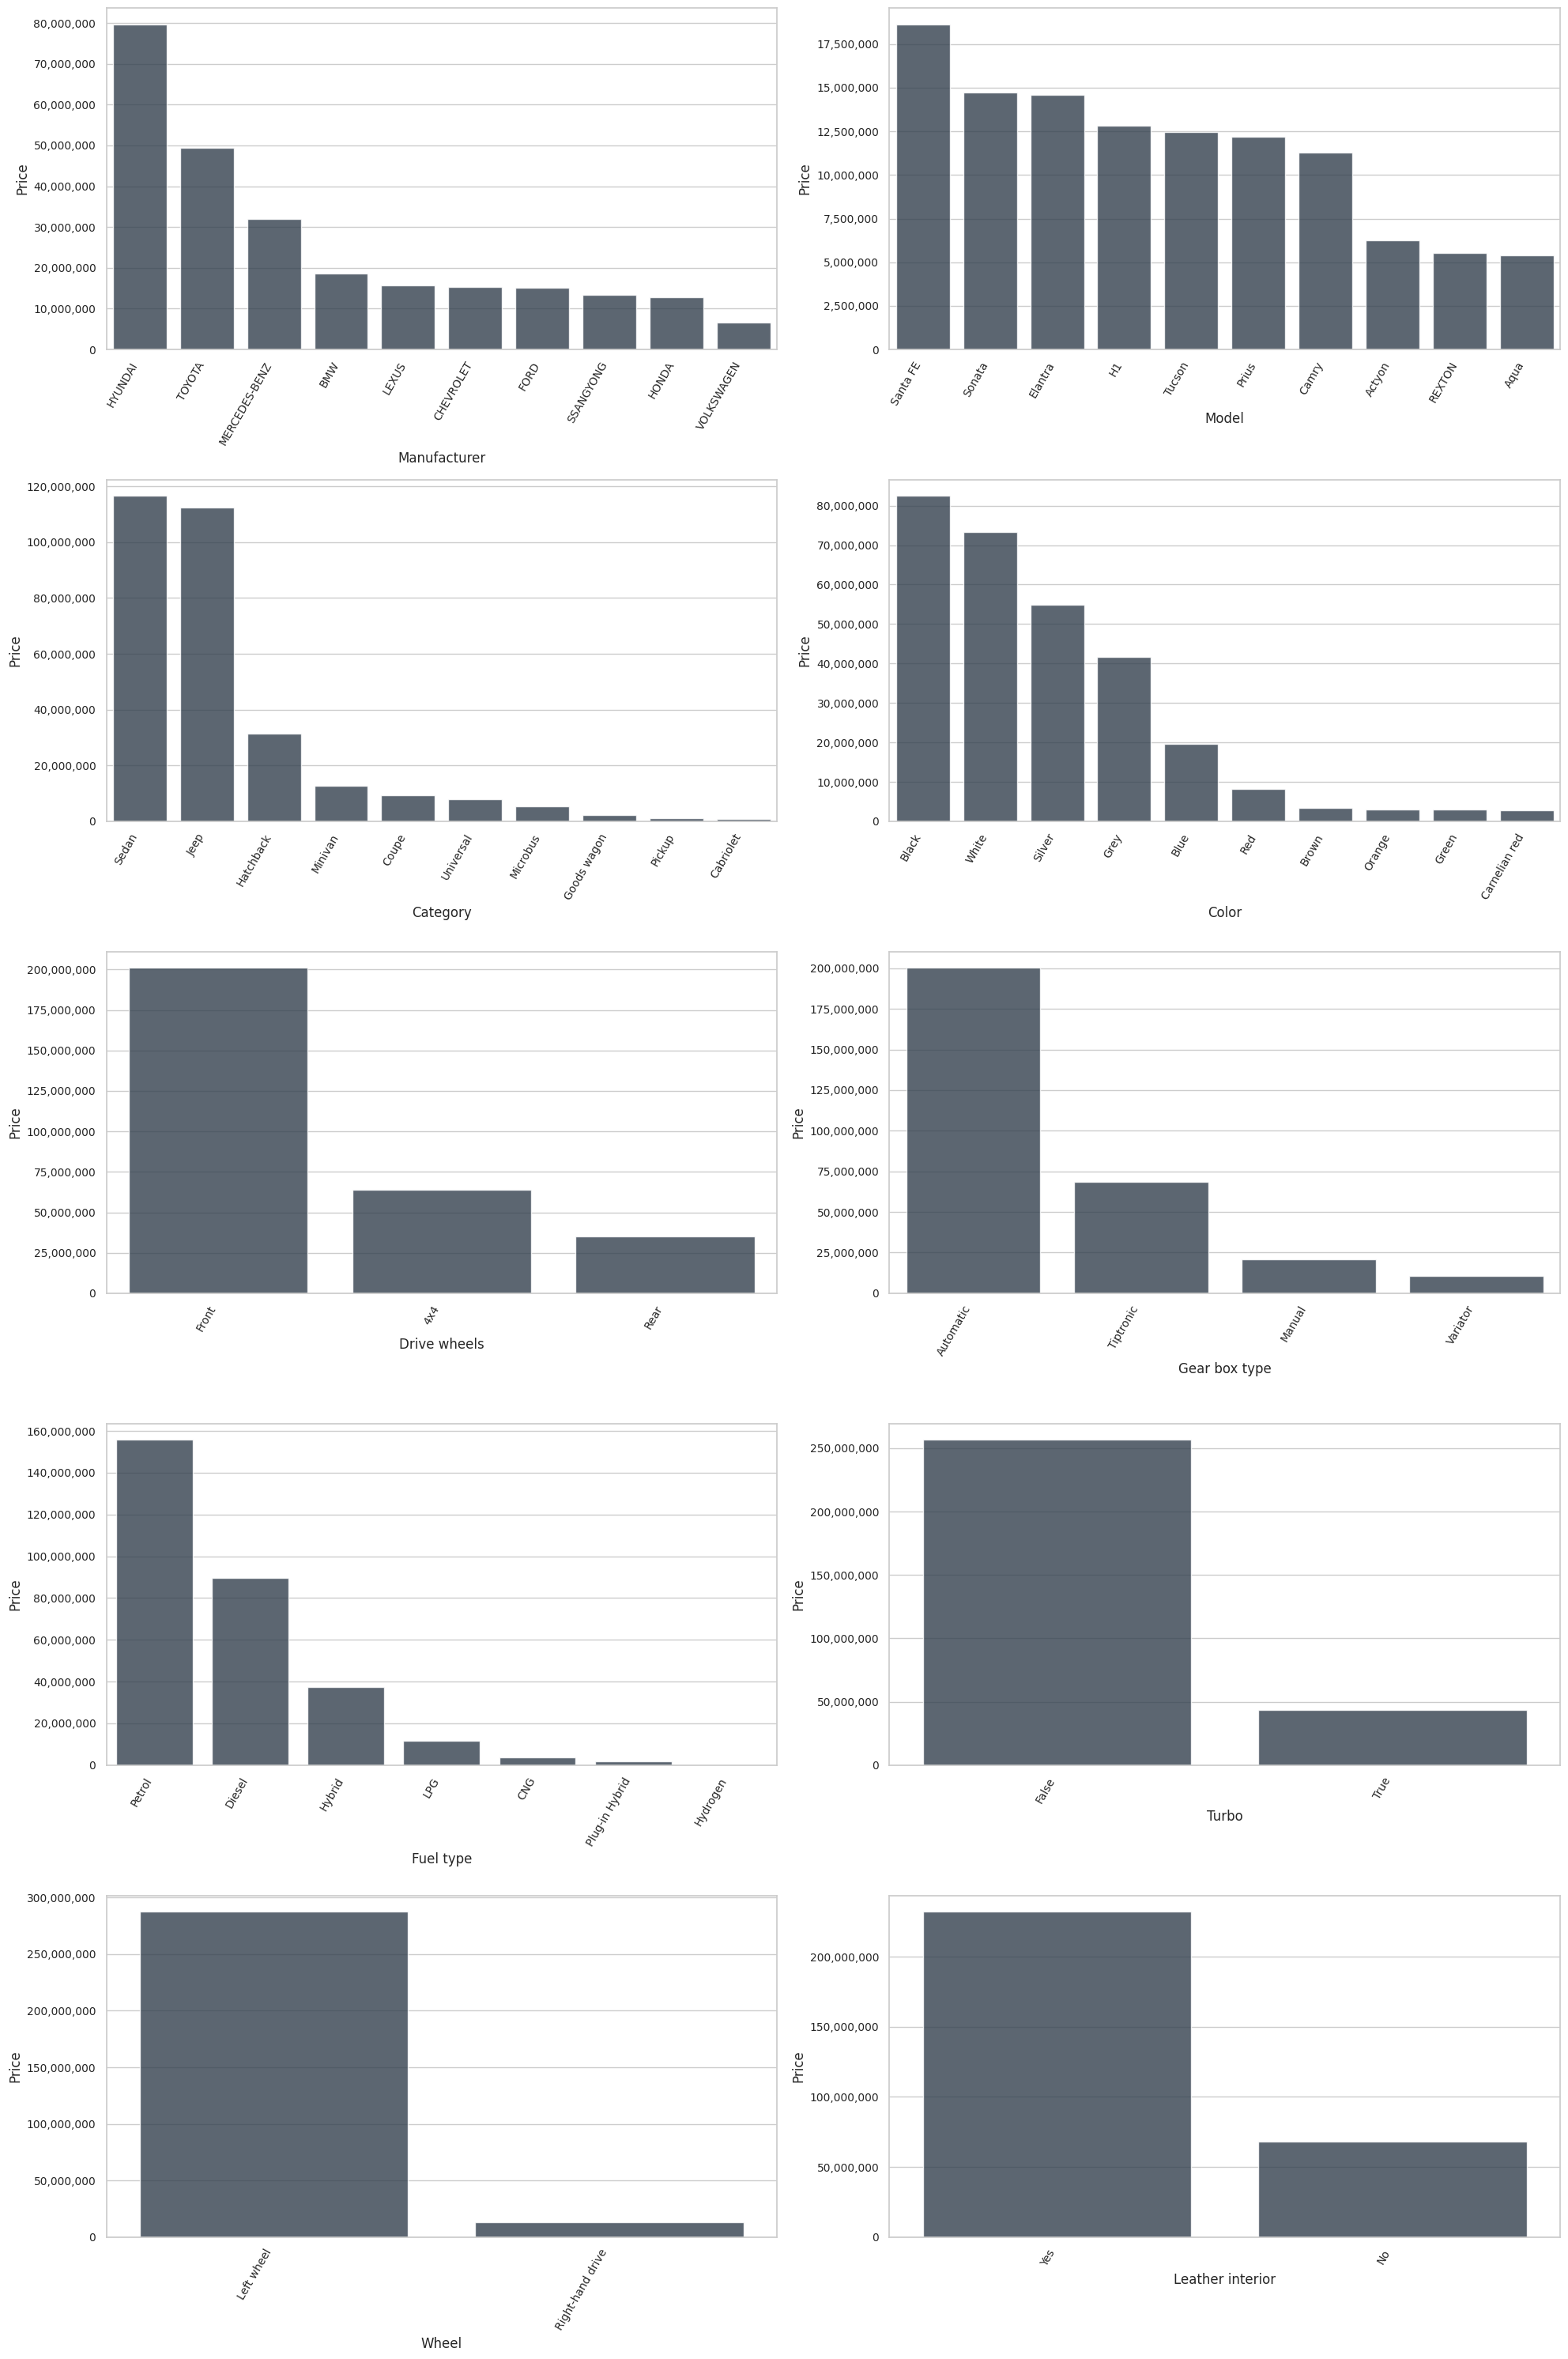

In [31]:
columnas_seleccionadas = ['Manufacturer','Model','Category' , 'Color' , 'Drive wheels', 'Gear box type', 'Fuel type' , 'Turbo', 'Wheel', 'Leather interior']

#Indicamos el tamaño de los gráficos
plt.figure(figsize=(20, 30))

#Corremos un ciclo for para ir graficando cada una de las variables
for i, column in enumerate(columnas_seleccionadas):
    plt.subplot(5, 2, i + 1)
    price_total = dataset[[column, "Price"]].groupby(column).sum()
    price_total = price_total.sort_values(by='Price', ascending=False).head(10)
    sns.barplot(data=price_total, x=price_total.index, y="Price", color='#2e4053', alpha=0.8)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.xticks(rotation=60, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    current_axes = plt.gca()
    current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()


*Se realizaron los gráficos de barra para poder observar la sumatoria del precio de los automoviles segmentados por las variables cualitativas y así poder determinar si alguna de estas concentra la mayor cantidad de valor en usd, lo cual nos podria servir para enfocarenos en el modelo.*

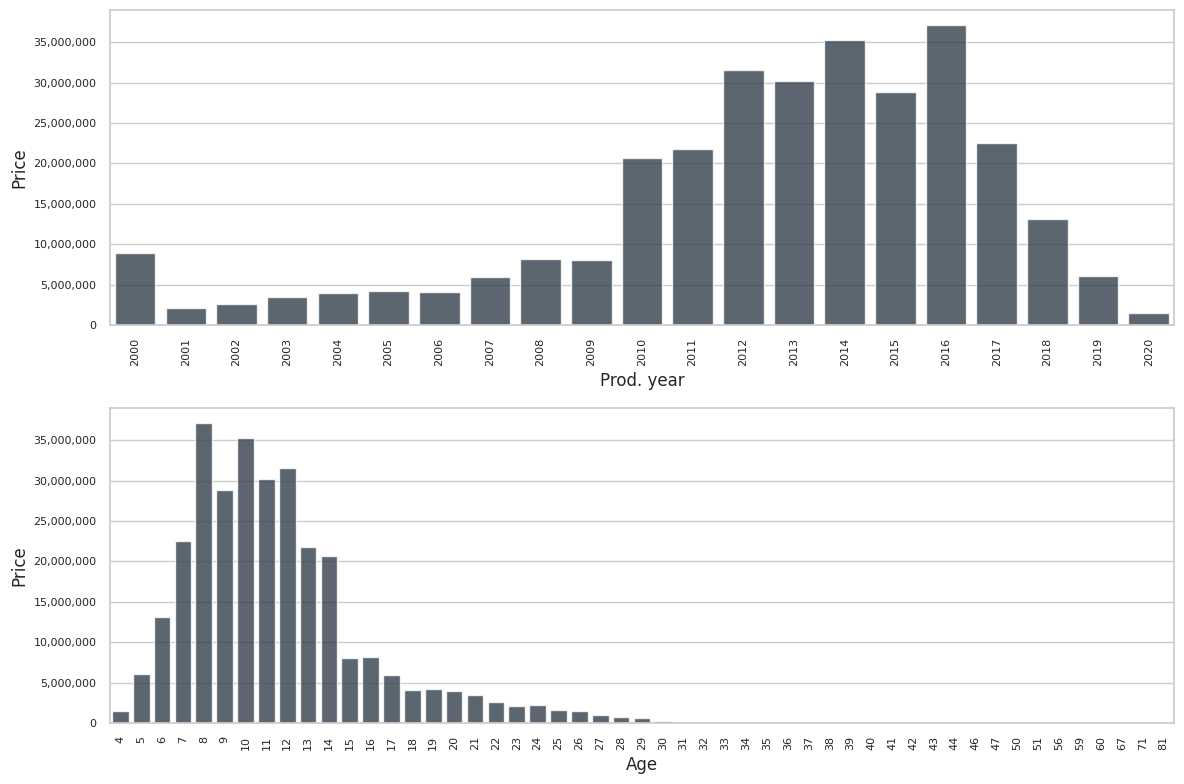

In [32]:
columnas_seleccionadas = ['Prod. year', 'Age']

#Indicamos el tamaño de los gráficos
plt.figure(figsize=(12, 8))

#Corremos un ciclo for para ir graficando cada una de las variables
for i, column in enumerate(columnas_seleccionadas):
    plt.subplot(2, 1, i + 1)
    price_total = dataset[[column, "Price"]].groupby(column).sum()
    sns.barplot(data=price_total, x=price_total.index, y="Price", color='#2e4053', alpha=0.8)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.xticks(rotation=90, horizontalalignment='center', fontsize=8)
    plt.yticks(fontsize=8)
    current_axes = plt.gca()
    current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()

*Se realizaron los gráficos de barra para poder observar la sumatoria del precio de los automoviles distribuidos por el año de fabricación y edad, y así poder determinar como estan distribuidas las muestras.*

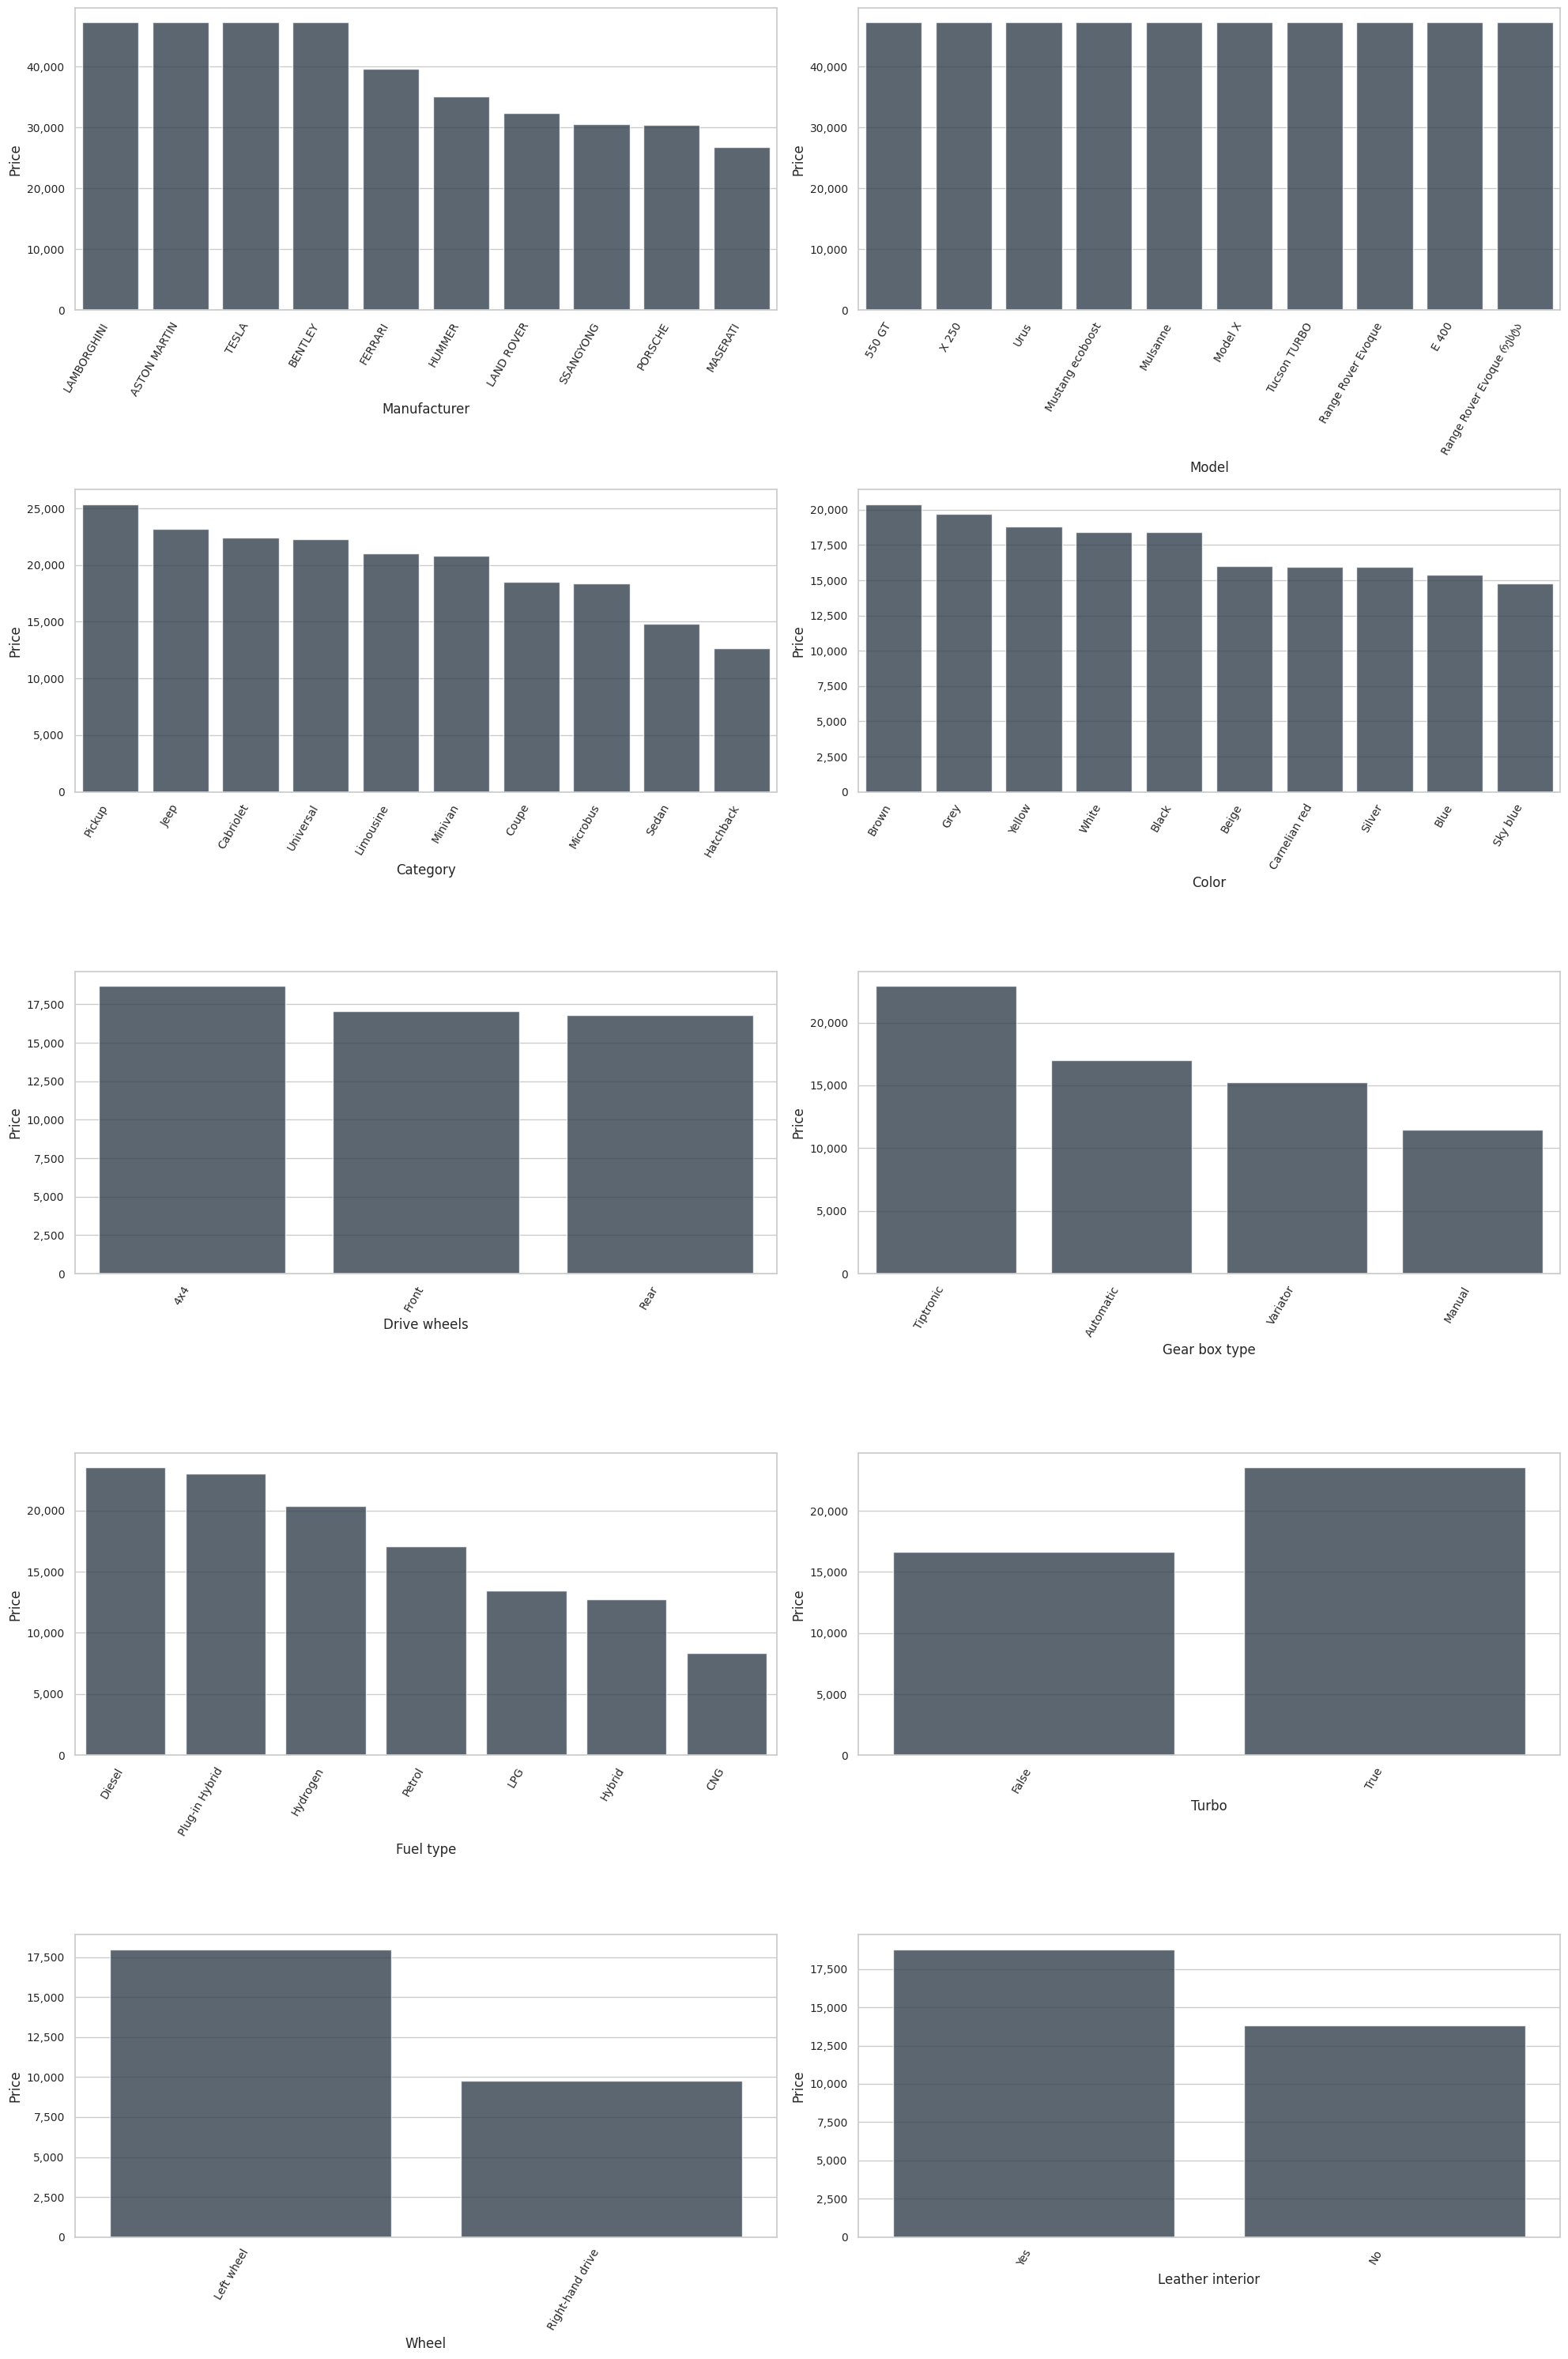

In [33]:
columnas_seleccionadas = ['Manufacturer','Model','Category' , 'Color' , 'Drive wheels', 'Gear box type', 'Fuel type' , 'Turbo', 'Wheel', 'Leather interior']

#Indicamos el tamaño de los gráficos
plt.figure(figsize=(20, 30))

#Corremos un ciclo for para ir graficando cada una de las variables
for i, column in enumerate(columnas_seleccionadas):
    plt.subplot(5, 2, i + 1)
    average_prices = dataset[[column, "Price"]].groupby(column).mean()
    average_prices = average_prices.sort_values(by='Price', ascending=False).head(10)
    sns.barplot(data=average_prices, x=average_prices.index, y="Price", color='#2e4053', alpha=0.8)
    plt.xticks(rotation=60, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    current_axes = plt.gca()
    current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()


*Se realizaron los gráficos de barra para poder observar los valores promedios del precio de los automoviles segmentados por las variables cualitativas y así poder determinar si alguna de estas concentra la mayor cantidad de valor en usd, lo cual nos podria servir para enfocarenos en el modelo.*

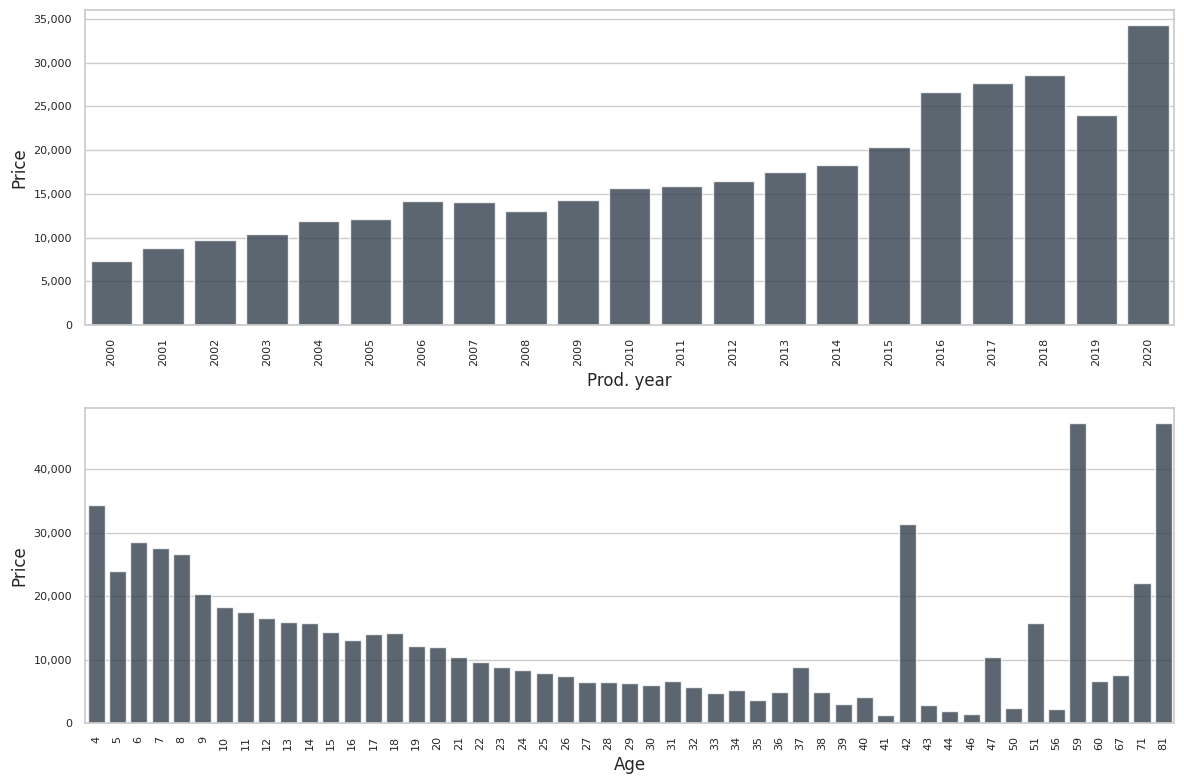

In [34]:
columnas_seleccionadas = ['Prod. year', 'Age']

#Indicamos el tamaño de los gráficos
plt.figure(figsize=(12, 8))

#Corremos un ciclo for para ir graficando cada una de las variables
for i, column in enumerate(columnas_seleccionadas):
    plt.subplot(2, 1, i + 1)
    average_prices = dataset[[column, "Price"]].groupby(column).mean()
    sns.barplot(data=average_prices, x=average_prices.index, y="Price", color='#2e4053', alpha=0.8)
    plt.ticklabel_format(useOffset=False, style='plain', axis='y')
    plt.xticks(rotation=90, horizontalalignment='center', fontsize=8)
    plt.yticks(fontsize=8)
    current_axes = plt.gca()
    current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()

Se realizaron los gráficos de barra para poder observar el precio promedio de los automoviles distribuidos por el año de fabricación y edad, y así poder determinar como estan distribuidas las muestras.

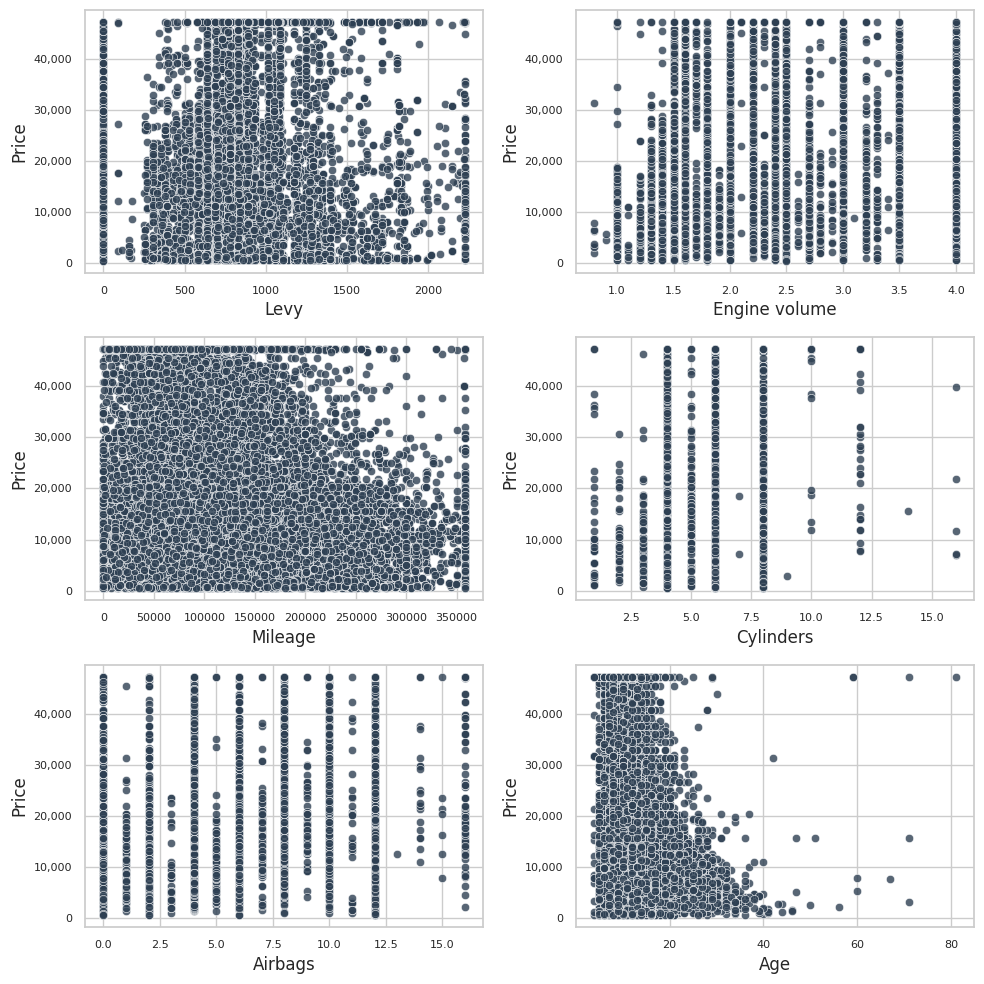

In [35]:
columnas_seleccionadas = ['Levy', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Age']

#Indicamos el tamaño de los gráficos
plt.figure(figsize=(10, 10))

#Corremos un ciclo for para ir graficando cada una de las variables
for i, column in enumerate(columnas_seleccionadas):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(data=dataset, x=dataset[column], y="Price", color='#2e4053', alpha=0.8)
    plt.xticks(horizontalalignment='center', fontsize=8)
    plt.yticks(fontsize=8)
    current_axes = plt.gca()
    current_axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()


*Se graficaron las variables cuantitativas para observar su respectiva relación con el precio de valoración de los automoviles, todo esto con la idea de detectar algún patrón que nos indicara si una de estas variables tiene relación con nuestra variable objetivo, lamentablemente los gráficos no nos indican una relación directa de ninguna de estas variables con el precio.*

### **Análisis multivariado**

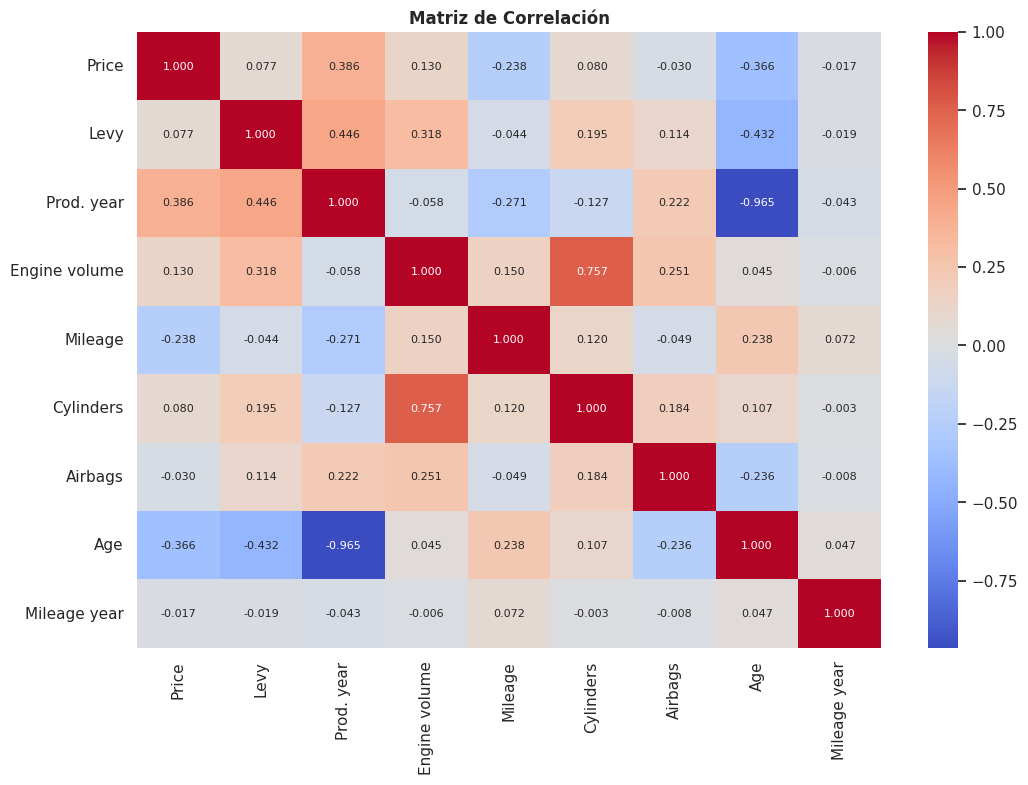

In [36]:
# Selecciona solo las variables float e int
cuantitative_var = dataset.select_dtypes(include=['float64', 'int64']).columns

# Cálculo de la correlación
correlation_matrix = dataset[cuantitative_var].corr()

#Gráfica el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 8}, fmt='.3f')
plt.title('Matriz de Correlación', weight='bold')
plt.show()

*Graficamos una matriz de correlación de todas las variables cuantitativas, este nos indica los valores de correlación con nuestra variable objetivo en este caso estos valores son muy cercanos a 0 indicándonos que no existe una relación lineal.*

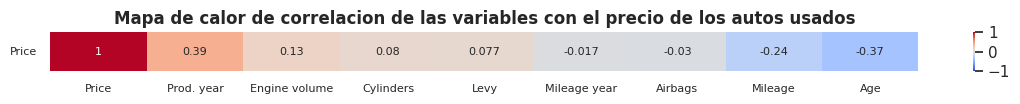

In [37]:
# Calculamos la correlación entre las variables cuantitativas y la varible objetivo (Price)
Target_corr  = dataset[cuantitative_var].corr().loc[:, 'Price'].to_frame().sort_values(by = 'Price' , ascending=False).T

# Graficamos
plt.figure(figsize=(14,0.5))
plot = sns.heatmap(Target_corr, annot=True, cmap='coolwarm', vmin = -1, annot_kws={"size": 8})
plt.title('Mapa de calor de correlacion de las variables con el precio de los autos usados', weight='bold')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0, horizontalalignment='center', fontsize=8)
plot.set_yticklabels(plot.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=8)
plt.show()

*Graficamos un mapa correlación destacando las variables cuantitativas con mayor relación.*

## **Preprocesamiento de datos**

### **Instalacion de librerías**

In [38]:
!pip install pandas scikit-learn

In [39]:
!pip install pandas dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 6.1 MB/s eta 0:00:00


In [40]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.5 MB/s eta 0:00:00


*Instalamos 3 librerías que usaremos en la etapa de modelado.*

### **Librerías necesarias para implementar los modelos**

In [41]:
# Librerías para los diferentes módelos predictivos
# Segmentación
from sklearn.model_selection import train_test_split
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# GridsearchCV
from sklearn.model_selection import GridSearchCV
# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
# Métricas de los modelos
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

*Definimos las librerías, para las diversas etapas del modelado, segmentación del dataset, preprocesamiento de los datos, selección de los modelos, modelado y métricas del modelo*

### **Selección de la variable objetivo y las variables independientes**

In [42]:
# Se elimina del eje X la variable objetivo
X = dataset.drop(columns=['Price'], axis=1)

# Se asigna al eje y la variable objetivo
y = dataset['Price']

In [43]:
# Variables dependientes
X.columns

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Turbo', 'Age', 'Mileage year'],
      dtype='object')

In [44]:
# Varioable objetivo
y.sample(10)

15644    11604
2852     26971
1082      7683
91       15458
3184     47278
12558    19757
15681    17663
2501     16935
14339    38251
14295     1019
Name: Price, dtype: int64

*Dividimos las variables dependientes y la variable objetivo en los elemento X y Y*

### **Codificación de variables**

In [45]:
# Se separan las variables numéricas y categóricas

# Variables numéricas
numeric_value = X.select_dtypes(exclude=['object']).columns.tolist()

# Variables categóricas
categoric_value = X.select_dtypes(include=['object']).columns.tolist()

In [46]:
# Variables numéricas
numeric_value

['Levy',
 'Prod. year',
 'Engine volume',
 'Mileage',
 'Cylinders',
 'Airbags',
 'Turbo',
 'Age',
 'Mileage year']

In [47]:
# Variables categóricas
categoric_value

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

*Se separan las variables en numéricas (int, float y boolean) y categóricas (object)*



### **Pipelines de Preprocesamiento**

In [48]:
# Transformadores
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer =  Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_value),
        ('cat', categorical_transformer, categoric_value)
    ]
     )

preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Levy', 'Prod. year', 'Engine volume',
                                  'Mileage', 'Cylinders', 'Airbags', 'Turbo',
                                  'Age', 'Mileage year']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Manufacturer', 'Model', 'Category',
                                  'Leather interior', 'Fuel type',
                                  'Gear box type', 'Drive wheels', 'Doors',
                                  'Wheel', 'Color'])])

*Definimos los transformadores de las variables numéricas y categóricas, para luego definir la función de preprocesamiento de estos.*

In [49]:
# Extracción de etiquetas de las diversas variables una vez preprocesadas
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__Levy', 'num__Prod. year', 'num__Engine volume', ...,
       'cat__Color_Sky blue', 'cat__Color_White', 'cat__Color_Yellow'],
      dtype=object)

*Realizamos la extracción de los nombres de las variables despues del preprocesamiento para poder utilizarlos con la función shap, ya que OneHotEncoder las identifica a todas como Features seguidas de un número.*

## **Modelado**

### **División de datos en conjuntos de entrenamiento y prueba**

In [50]:
# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*División del dataset en 2 conjuntos uno de entrenamiento y uno de prueba (20% del dataset) .*

In [51]:
# Procesamiento de los conjuntos de entrenamiento y prueba
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

*Se realiza el preprocesamiento de los conjuntos de entrenamiento y prueba.*

### **GridSearch y CrossValidation**

In [52]:
# Creación de un diccionario de modelos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    }

*Definimos el listado de los modelos que vamos a utilizar para evaluar.*

In [53]:
# Creación de una grilla con diversos párametros para los modelos
param_grid = {
    'LinearRegression': {},
    'DecisionTreeRegressor': {'max_depth': [5, 10]},
    'RandomForestRegressor': {'n_estimators': [100, 200], 'max_depth': [5, 10]},
    'XGBRegressor': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]},
    'GradientBoostingRegressor': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]},
}

*Definimos el listado de los párametros de los modelos que vamos a utilizar para evaluar.*

In [54]:
# Búsqueda en grilla y evaluación

all_results = []

for model_name, model in models.items():
    print(f"\nEvaluando modelo: {model_name}")

    param_grid_key = type(model).__name__

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[param_grid_key], cv=5)
    grid_search.fit(X_train, y_train)

    print(f"Mejores parámetros para {model_name}: {grid_search.best_params_}")
    print(f"Mejor puntuación para {model_name}: {grid_search.best_score_}")

    # Crear un DataFrame con los resultados del modelo actual
    cv_results = grid_search.cv_results_
    df_results = pd.DataFrame(cv_results)
    df_results['model'] = model_name  # Agregar una columna para identificar el modelo
    all_results.append(df_results)

    # Concatenar los DataFrames de todos los modelos en un solo DataFrame
    df_all_results = pd.concat(all_results, ignore_index=True)



Evaluando modelo: Linear Regression
Mejores parámetros para Linear Regression: {}
Mejor puntuación para Linear Regression: 0.5171486317468703

Evaluando modelo: Decision Tree
Mejores parámetros para Decision Tree: {'max_depth': 10}
Mejor puntuación para Decision Tree: 0.66045905839487

Evaluando modelo: Random Forest
Mejores parámetros para Random Forest: {'max_depth': 10, 'n_estimators': 200}
Mejor puntuación para Random Forest: 0.7493509819870228

Evaluando modelo: XGBoost
Mejores parámetros para XGBoost: {'max_depth': 7, 'n_estimators': 200}
Mejor puntuación para XGBoost: 0.7899363279342652

Evaluando modelo: Gradient Boosting
Mejores parámetros para Gradient Boosting: {'max_depth': 7, 'n_estimators': 200}
Mejor puntuación para Gradient Boosting: 0.7903432742121881


*Evaluamos cada uno de los modelos con sus respectivos párametros y asi poder identificar el que nos arroja las mejores métricas, usando los conjuntos de entrenamiento .*

### **Evaluacion de Modelos**

In [55]:
df_all_results.sort_values("mean_test_score", ascending=False)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
18      17.321844      0.403167         0.039942        0.005504   
12       1.044660      0.028774         0.023711        0.000584   
11       1.136559      0.941833         0.016783        0.005623   
17      10.150016      0.487841         0.024061        0.000490   
10       0.647090      0.008721         0.019089        0.000285   
9        0.370559      0.008426         0.011544        0.000232   
16      12.614696      0.250075         0.028501        0.002600   
6       53.205168      0.274971         0.072473        0.003178   
5       28.129418      3.137530         0.048255        0.001847   
15       6.941301      0.435746         0.020981        0.002442   
8        0.353996      0.005537         0.014954        0.001357   
7        0.245682      0.071313         0.011491        0.003159   
14       8.734855      0.510704         0.021354        0.002743   
13       4.484982      0.335619         0.013562        0.001778   
2        0.710998      0.191761         0.004004        0.002178   
3        8.925996      2.954476         0.039399        0.016015   
4       13.829595      0.401813         0.048381        0.004278   
0        1.409623      0.352823         0.002808        0.001745   
1        0.288296      0.021764         0.005234        0.003768   

                                    params  split0_test_score  \
18   {'max_depth': 7, 'n_estimators': 200}           0.787671   
12   {'max_depth': 7, 'n_estimators': 200}           0.782586   
11   {'max_depth': 7, 'n_estimators': 100}           0.776702   
17   {'max_depth': 7, 'n_estimators': 100}           0.777448   
10   {'max_depth': 5, 'n_estimators': 200}           0.779278   
9    {'max_depth': 5, 'n_estimators': 100}           0.767780   
16   {'max_depth': 5, 'n_estimators': 200}           0.756851   
6   {'max_depth': 10, 'n_estimators': 200}           0.746764   
5   {'max_depth': 10, 'n_estimators': 100}           0.744556   
15   {'max_depth': 5, 'n_estimators': 100}           0.741740   
8    {'max_depth': 3, 'n_estimators': 200}           0.729479   
7    {'max_depth': 3, 'n_estimators': 100}           0.708049   
14   {'max_depth': 3, 'n_estimators': 200}           0.697757   
13   {'max_depth': 3, 'n_estimators': 100}           0.666208   
2                        {'max_depth': 10}           0.665495   
3    {'max_depth': 5, 'n_estimators': 100}           0.523354   
4    {'max_depth': 5, 'n_estimators': 200}           0.524404   
0                                       {}           0.532901   
1                         {'max_depth': 5}           0.468117   

    split1_test_score  split2_test_score  split3_test_score  \
18           0.802439           0.787199           0.790520   
12           0.804924           0.785845           0.790330   
11           0.795833           0.780586           0.781741   
17           0.798950           0.776767           0.780966   
10           0.789318           0.777067           0.769975   
9            0.775815           0.754217           0.755512   
16           0.776934           0.754176           0.762065   
6            0.764798           0.742592           0.747021   
5            0.765229           0.738612           0.745557   
15           0.763122           0.738328           0.745666   
8            0.752848           0.721446           0.722812   
7            0.727325           0.695934           0.701813   
14           0.711204           0.693198           0.691100   
13           0.681082           0.660167           0.658065   
2            0.681855           0.665431           0.646706   
3            0.558135           0.526232           0.533943   
4            0.559233           0.525115           0.535766   
0            0.509090           0.497312           0.503925   
1            0.481206           0.457213           0.474521   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
18    

*Podemos ver un listado con todos los modelos y sus respectivos parámetros, para analizar en detalle los resultados obtenidos a través de la GridSearch y CrossValidation en cada una de los splits y el resultado promedio.*

In [56]:
# Encontrar el índice de la fila con la mejor puntuación
best_index = df_all_results['mean_test_score'].idxmax()

# Obtener los parámetros del mejor modelo
best_params_series = df_all_results.loc[best_index, df_all_results.columns.str.startswith('param_')]

# Convertir la Serie a un diccionario y eliminar el prefijo 'param_' de las claves
#  Asegurarse de que 'max_depth' y 'n_estimators' sean enteros si están presentes
best_params = {
    k.replace('param_', ''): int(v) if k.replace('param_', '') in ['max_depth', 'n_estimators'] and pd.notna(v) else v
    for k, v in best_params_series.items()
    if pd.notna(v)
}

# Obtener el nombre del mejor modelo
best_model_name = df_all_results.loc[best_index, 'model']

# Crear una nueva instancia del mejor modelo con los mejores parámetros
best_model = models[best_model_name]
best_model.set_params(**best_params)

# Entrenar el mejor modelo con todos los datos de entrenamiento
best_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, n_estimators=200)

*Del listado nos traemos el modelo con mejor rendimiento y los párametros que dieron ese rendimiento.*

### **Predicción con conjunto de prueba**

In [57]:
y_pred=best_model.predict(X_test)

*Realizamos la predicción de los valores de y (y_pred) con el modelo entrenado.*

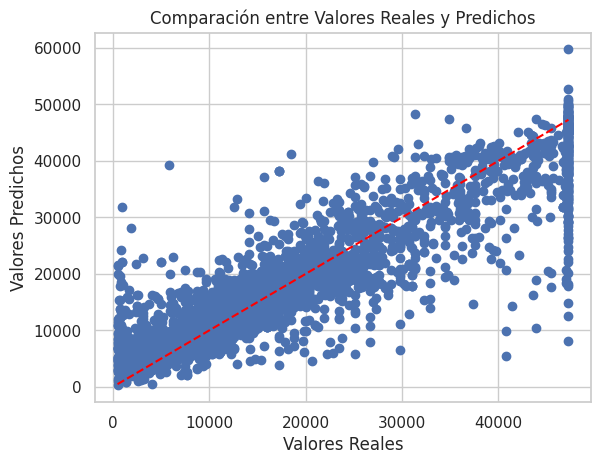

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia ideal
plt.show()

*Graficamos los valores predichos (y_pred) vs los valores reales (y_test), en el grafico podemos detectar que nuestro modelo tiene problemas en los que tiende a asignar valores más bajos de los que corresponde a automóviles de precio alto y en los casos de automóviles de precio bajo tiende a asignar valores superiores a los reales.*

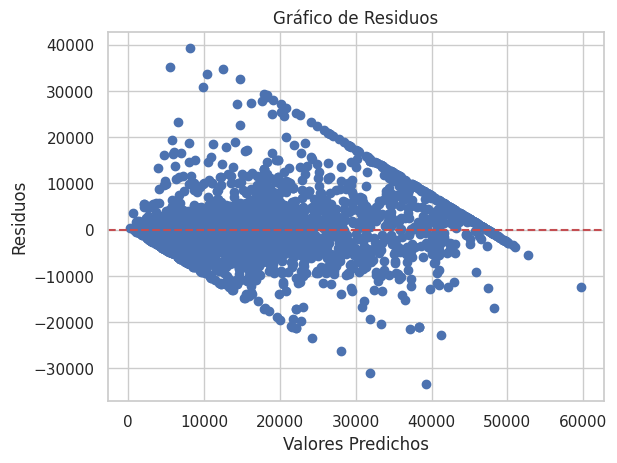

In [59]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.axhline(y=0, color='r', linestyle='--')  # Línea de referencia para cero
plt.show()

*Graficamos los residuos entre los valores predichos (y_pred) vs los valores reales (y_test), aca podemos ver de manera mas clara los problemas que  tiene nuestro modelo en los que tiende a asignar valores por debajo de los que corresponde a automóviles de precio alto y en los casos de automóviles de precio bajo tiende a asignar valores superiores a los reales.*

### **Métricas del modelado**

In [60]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 33434622.940647554
RMSE: 5782.267975513376
MAE: 3900.542208912164
R²: 0.8133887312539656


*Métricas principales de los modelos de ML de regresión.*

In [61]:
!pip install shap

*Instalamos la librería shap.*

In [62]:
import shap

*Importamos la librería shap.*

In [63]:
explainer = shap.Explainer(best_model)

*Generamos el objeto explainer para poder usar las funciones de SHAP*

In [64]:
X_test.shape

(3459, 1501)

In [65]:
from scipy.sparse import issparse

# Assuming X_test is your sparse matrix
# Convert X_test to a dense numpy array with a numeric dtype
if issparse(X_test):
    X_test_dense = X_test.toarray().astype(np.float64)
else:
    X_test_dense = X_test.astype(np.float64)

# Now use the dense array with the explainer
explainer = shap.Explainer(best_model) # Assuming 'best_model' is defined
shap_values = explainer(X_test_dense)

*Realizamos las conversiones necesarias de los datos para poder ser utilizados en las funciones de SHAP*

In [66]:
feature_names=preprocessor.get_feature_names_out()
shap_values.feature_names = feature_names

*Asignamos las etiquetas originales de cada una de las variables*

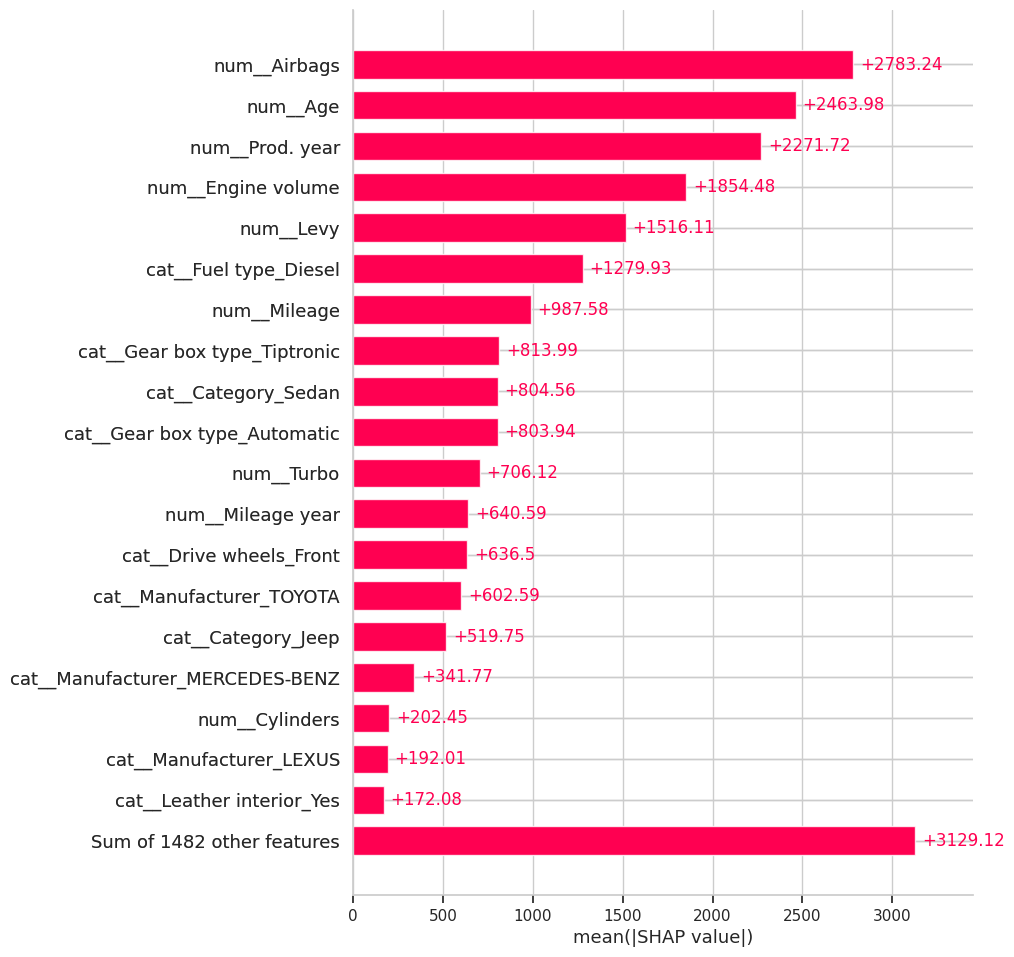

In [67]:
shap.plots.bar(shap_values, max_display=20)  # Mostrar las 20 características más importantes

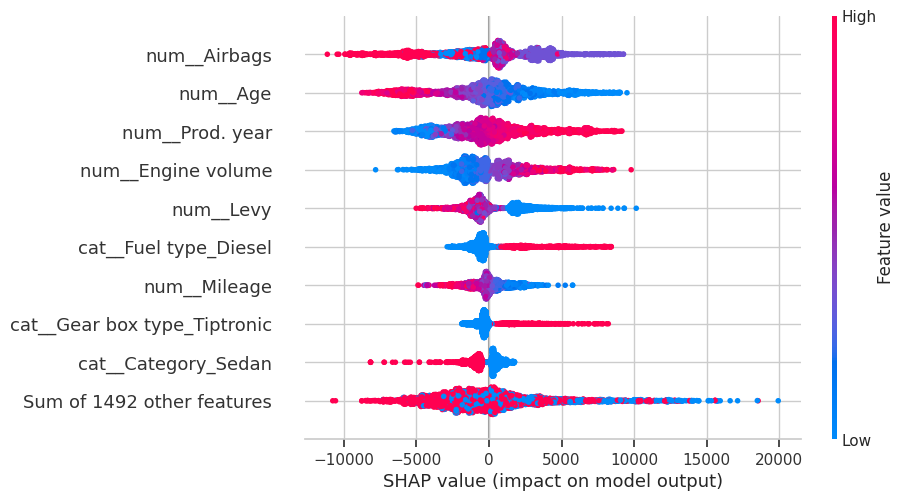

In [68]:
shap.plots.beeswarm(shap_values)

*En los graficos anteriores podemos ver las variables que tienen mayor impacto en el precio que se le asigna a los automóviles usados con nuesto modelo, en nuestro caso podemos ver que las 5 principales son la cantidad de airbags, el año de producción del vehiculo o la edad del mismo, el volumen del motor, el impuesto que este tiene asociado y con respecto al tipo de combustible que sea de Diesel*

In [69]:
shap.initjs()# en colab, tiene que ir en la misma celda
shap.plots.force(shap_values[459],figsize=(15, 3))

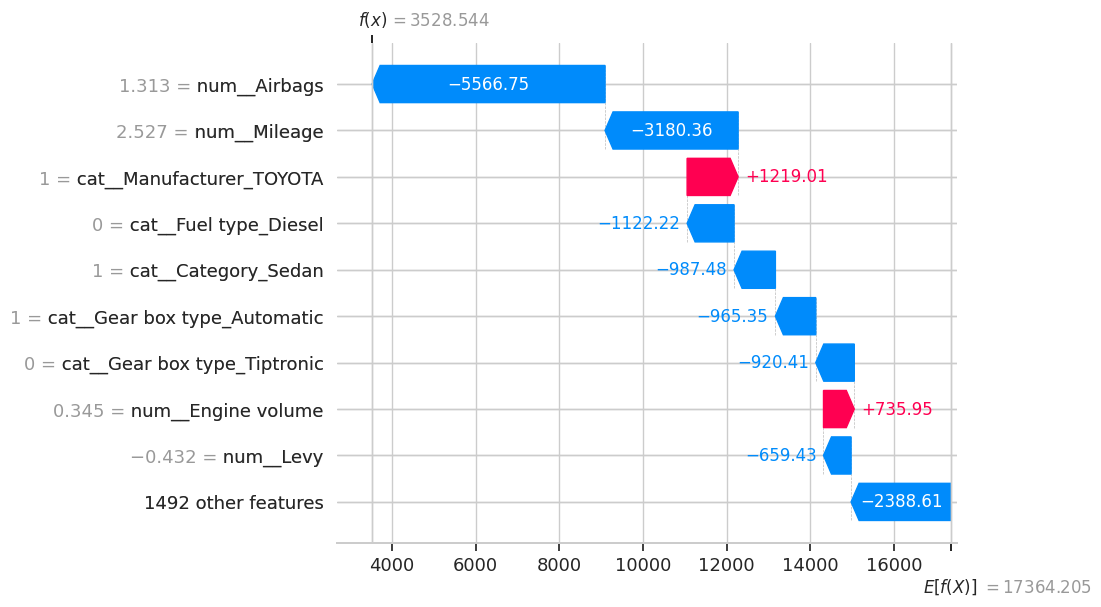

In [70]:
shap.plots.waterfall(shap_values[459])

In [71]:
shap.initjs()# en colab, tiene que ir en la misma celda
shap.plots.force(shap_values[2873],figsize=(15, 3))

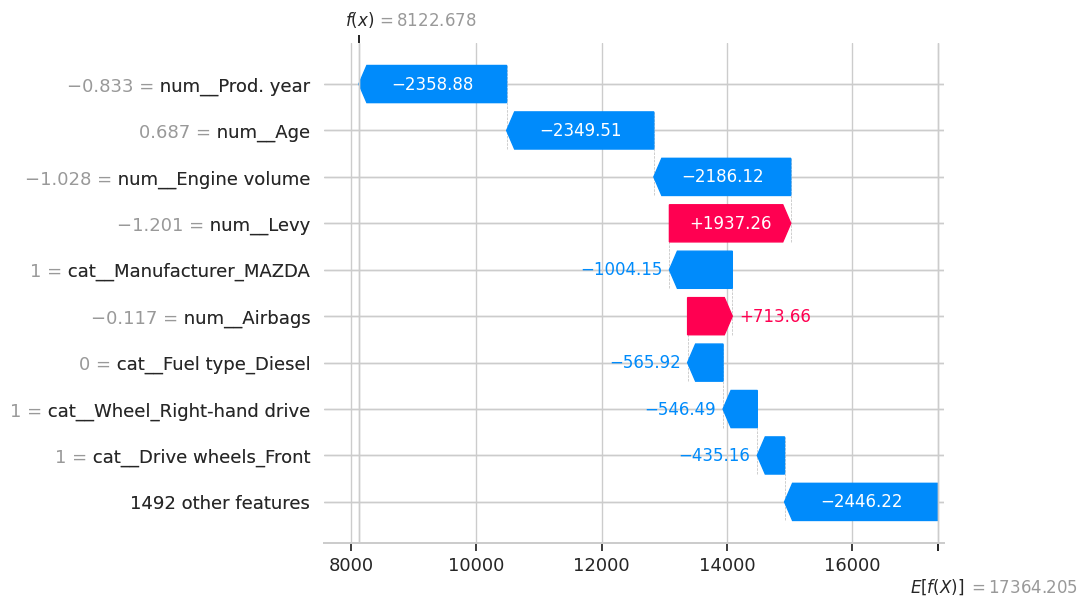

In [72]:
shap.plots.waterfall(shap_values[2873])

*Los graficos anteriores nos indican de manera detallada en 2 muestras (459 y 2873), como las diversas variables actuan en el precio final, esto nos ayuda a entender los calculos que realiza nuestro modelo y como las diversas caracteristicas del automóvil impactan incrementando o disminuyendo el valor final de este*

## **Conclusiones Finales**

### **Conclusiones del modelado**

- Las variables más significativas que afectan para aumentar o disminuir el valor de un auto usado serian según nuestro modelo la cantidad de airbags, la edad del auto, el volumen del motor, el impuesto asociado a este, el tipo de combustible (Diesel), el kilometraje, tipo de transmisión (Tiptronica o Automatica), categoría del auto, versión turbo y el uso por año (kilometraje promedio).


- Buen ajuste general: El valor de R² obtenido de 0.81, nos indica que el modelo cuenta con una proporción significativa de la variabilidad en los precios. Esto nos sugiere que las variables incluidas en este son relevantes y contribuyen a explicar el precio de los automóviles usados.

- Errores de predicción significativos: Los valores obtenidos de MSE , RMSE  y MAE indican que, a pesar del buen ajuste general, el modelo todavía comete errores de predicción considerables. Esto significa que las predicciones individuales pueden no ser muy precisas, especialmente para automóviles con características inusuales o con valores de precios cercanos a ambos extremos.

- Heterocedasticidad: La combinación de un R² relativamente alto y un MSE elevado sugiere que el modelo podría estar sufriendo de heterocedasticidad, como pudimos observar en el gráfico comparativo de los valores predichos vs los valores reales. Esto significa que la variabilidad de los errores de predicción no es constante a lo largo de todos los valores predichos.

### **Recomendaciones para el modelado**

Para mejorar la condición de heterocedasticidad del modelo podemos realizar los siguientes ajustes:

- Aplicar transformaciones logarítmicas o de raíz cuadrada al precio de venta puede ayudar a estabilizar la varianza y mejorar el ajuste del modelo.



- Considerar modelos más flexibles: el uso de redes neuronales pueden capturar relaciones más complejas entre las variables y mejorar la precisión de las predicciones.

- Reducir el número de variables innecesarias, para hacer mas sencillo el modelo.

### **Conclusiones del caso de negocio**

Para nuestro caso de negocio, en el cual buscamos tener un valor aproximado del precio de un automóvil usado sin que se requiere de la presencia de un perito o una revisión a fondo de este, se considera que este modelo de ML cumple con el requerimiento ya que el mismo tiene mejor rendimiento para los autos en el sector de precio medio por lo que una empresa podría agilizar el proceso de forma considerable.

Al tener el listado de la importancia de las variables y cómo actúan estas en el precio se podría diseñar un formulario de uso tanto para la empresa que vende o para el cliente que desea vender, el cual le daría un rango de precio estimado del valor de su automóvil con solo indicar algunas características de este.

Otra manera de aplicarlo seria que basado en un presupuesto del futuro comprador se podrían indicar un listado de las posibles combinaciones de características que puede tener un automóvil para mantener ese rango de precio o el caso contario que definiendo características especificas le de un valor aproximado del costo que tendría ese automóvil.